# Analisis de Base de datos de Healthy live

https://drive.google.com/drive/folders/1pkNxriJ2rIWAUU5l7OIyRN-ZzEQJBx7x?usp=sharing


Detalles

---

Este conjunto de datos contiene información relacionada con la atención de urgencias en la Regional Salud Caldas. Incluye las siguientes mediciones que son base para determinar el TRIAGE:

Saturación SpO2
Ritmo cardíaco (Lpm)
Temperatura (°C)
Presión arterial (mmHg)
Frecuencia respiratoria (Rpm)
La información contenida es de carácter confidencial, por lo que no puede ser empleada en otros desarrollos o modelaciones.


## Características del Conjunto de Datos

### Información Básica:
- Número Documento Paciente
- Tipo Documento Paciente
- Primer Nombre Paciente
- Segundo Nombre Paciente
- Primer Apellido Paciente
- Segundo Apellido Paciente
- Fecha Nacimiento Paciente
- Edad Paciente
- Estado Conyugal Paciente
- Último Año Estudios Paciente
- Departamento Residencia
- Municipio Residencia
- Área Residencia	Barrio Residencia
- Dirección Residencia
- Localidad Comuna
- Centro Poblado Residencia
- Régimen Seguridad Social
- EPS
- SATURACION SpO2
- RITMO CARDIACO Lpm
- TEMPERATURA °C
- PRESION ARTERIAL mmHg
- Frec Respira Rpm





Fuente: Confidencial secretaria de Salud Gobernacion de Caldas - Informacion Interna, solo con propositos de modelamiento Healthy Life.


## ✨ Autores
👨‍💻 **Wilson Fernando Lopez Cardona**  
📌 *Creador de este cuaderno interactivo*  
📧 Contacto: [wlopezcc@gmail.com](mailto:wlopezcc@gmail.com)  

👨‍💻 **German Daniel Mejia Acosta**  
📌 *Creador de este cuaderno interactivo*  
📧 Contacto: [german.mejiaa@outlook.com](mailto:german.mejiaa@outlook.com)  

## ✨ Diseñador
🚀 *Este cuaderno ha sido diseñado por:
👨‍💻 **Frank Yesid Zapata Cataño**  
📌 *Diseñador de este cuaderno interactivo para aprender y aplicar conceptos clave de programación y análisis de datos de manera práctica. *  
📧 Contacto: [fyzapatac@gmail.com](mailto:fyzapatac@gmail.com)  



In [ ]:
# @title Conexión con la base de datos desde una URL

#@markdown - Forma 1 de descarga de archivos desde Google Drive con wget
# Forma de descarga de archivos desde Google Drive con wget
# Se requiere el uso de cookies para la autenticación
# Se debe obtener el ID del archivo de Google Drive para poder descargarlo
# Se usa el comando wget para descargar el archivo, gestionando las cookies
# param url: URL de la base de datos
# param nombre_archivo: Nombre del archivo a guardar

#https://docs.google.com/spreadsheets/d/1p8BY9NJPK5kWDG00PJb8VJa7wUSyPVZN/edit?usp=sharing&ouid=117161286468212361428&rtpof=true&sd=true


# Definir el ID del archivo de Google Drive
FILEID = '1p8BY9NJPK5kWDG00PJb8VJa7wUSyPVZN'
nombre_archivo = 'BASE_PACIENTES_TRIAGE_2024.xlsx'

# Descargar el archivo usando wget, gestionando las cookies
# Se usa --load-cookies para cargar las cookies guardadas temporalmente en /tmp/cookies.txt
# Se hace una primera solicitud con wget para obtener el token de confirmación que Google Drive envía cuando el archivo es grande o muy accedido
# El token se extrae usando sed (una utilidad para filtrar y procesar texto), que busca el patrón "confirm=" y captura el valor del token
# Una vez obtenido el token de confirmación, se realiza la descarga completa del archivo
# --no-check-certificate es usado para evitar errores de SSL (certificados) en entornos no seguros
# El archivo se guarda como "Spotify_Most_Streamed_Songs.csv" . indicado con el nombre del archivo en la variable "nombre_archivo"
# Finalmente, se eliminan las cookies temporales almacenadas en /tmp/cookies.txt

# con esta instrucción se descarga el archivo desde Google Drive
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O $nombre_archivo && rm -rf /tmp/cookies.txt


--2025-03-15 13:01:28--  https://docs.google.com/uc?export=download&confirm=&id=1p8BY9NJPK5kWDG00PJb8VJa7wUSyPVZN
Resolving docs.google.com (docs.google.com)... 172.217.12.14, 2607:f8b0:4025:815::200e
Connecting to docs.google.com (docs.google.com)|172.217.12.14|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1p8BY9NJPK5kWDG00PJb8VJa7wUSyPVZN&export=download [following]
--2025-03-15 13:01:28--  https://drive.usercontent.google.com/download?id=1p8BY9NJPK5kWDG00PJb8VJa7wUSyPVZN&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.65.97, 2607:f8b0:4025:804::2001
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.65.97|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 773428 (755K) [application/octet-stream]
Saving to: ‘BASE_PACIENTES_TRIAGE_2024.xlsx’

BASE_PACIENTES_TRIA 100%[===================>] 755.30K  -

# Desglose:

- FILEID = '1MLIoJF6lZNQA8v55qfPkNEHADAy_ZHZ': El ID del archivo de Google Drive que se desea descargar.
- Primera llamada wget:
Obtiene un token de confirmación cuando Google Drive requiere verificación extra para archivos grandes o descargados muchas veces.\
Usa sed para buscar y extraer el token de la respuesta de Google Drive.
- Segunda llamada wget:
Con el token, se realiza la descarga final del archivo.\
rm -rf /tmp/cookies.txt: Limpia las cookies temporales después de completar la descarga.

In [ ]:
# @title Instalar librerias a usar
%pip install sweetviz
%pip install missingno


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 43.3 MB/s eta 0:00:00


In [ ]:
# @title Carga de librerias
# Bibliotecas utilizadas
# ----------------------------------------------------------------------------
# pandas (pd): librería para el análisis de datos
# matplotlib (plt): librería para crear gráficos  este es es un libro de matplotlib matplotlib.pyplot
# seaborn (sns): librería para visualizar datos de manera estética
# Sweetviz (sw): Una biblioteca de análisis y visualización de datos en Python.
# files : Importa la función para subir y descargar archivos en Google Colab.
# os
# numpy
# missingno
# sqlite3
# Zipfile
# GoogleAuth
# GoogleDrive
# Auth
# GoogleCredentials
# Drive
# Shutil
# smtplib
# MIMEMultipart
# MIMEText

import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors, cm as matcolor
import seaborn as sns
import sweetviz as sw
from google.colab import files
import numpy as np
import missingno as msno
import sqlite3
from zipfile import ZipFile
from google.colab import files
from pydrive2.auth import GoogleAuth
from pydrive2.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from google.colab import drive
import shutil
import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText


In [ ]:
# @title Cargamos las funciones relacionadas
def analizar_columnas(healthy_life_df):  #carga una funcion  df es dataframe pandas DB  panas trabaja con diccionarios
  """
  Analiza las columnas de un DataFrame y devuelve información estadística.

  Parámetros:
  df (DataFrame): El DataFrame a analizar.

  Retorno:
  Un DataFrame con la información estadística de cada columna.

  Ejemplo:
  df_analizado = analizar_columnas(healthy_life_df)
  print(df_analizado)
  """
  info = []
  for columna in healthy_life_df.columns: # usa pandas .columns trae nombre de todas las columnas en este caso for columnas de la DB (df) nombres de columnas
    unicos = healthy_life_df[columna].nunique() # cargar los unicos
    nulos = healthy_life_df[columna].isnull().sum()  # sumar los nulos
    total = len(healthy_life_df)
    porcentaje_nulos = (nulos / total) * 100
    info.append({
      'Columna': columna,
      'Cantidad de registros': total,
      'Únicos': unicos,
      'Cantidad de nulos': nulos,
      'Porcentaje de nulos': porcentaje_nulos,
      'Registros relacionados con nulos': total - nulos
    })
  return pd.DataFrame(info) # pone en tablas

print ("Listo")


Listo


# Sección 1

### Paso 1: Cargar el archivo Excel

> Añadir blockquote



In [ ]:
# @title Cargar el archivo xlsx de base de datos Triage Caldas
# Ubicación en donde se almacena en drive
# file_path_drive = 'BASE_PACIENTES_TRIAGE_2024.xlsx'

Mi_DB='/content/BASE_PACIENTES_TRIAGE_2024.xlsx'
print("Mi_DB: ", Mi_DB)
healthy_life_df = pd.read_excel(Mi_DB)

#healthy_life_df = pd.read_excel(file_path_drive)

# Mostrar las primeras filas del archivo para ver cómo están organizados los datos
print("Primeras 5 filas de los datos de------:")
healthy_life_df.head()
# healthy_life_df.hist(bins=50, figsize=(20,15))


Mi_DB:  /content/BASE_PACIENTES_TRIAGE_2024.xlsx
Primeras 5 filas de los datos de------:


Número_Documento_Paciente Tipo_Documento_Paciente  Unnamed: 2  \
0                  20318965    CÉDULA DE CIUDADANÍA         NaN   
1                  15899601    CÉDULA DE CIUDADANÍA         NaN   
2                   3612573    CÉDULA DE CIUDADANÍA         NaN   
3                  24306667    CÉDULA DE CIUDADANÍA         NaN   
4                  24819710    CÉDULA DE CIUDADANÍA         NaN   

  Primer_Nombre_Paciente Segundo_Nombre_Paciente Primer_Apellido_Paciente  \
0                  CELIA                     NaN                    MEJIA   
1                  DIEGO                 ALBERTO                    HOYOS   
2                   JOSE                LISIMACO                  GALLEGO   
3                  MARIA                  MIRIAN                    LINCE   
4                 BLANCA                   NELLY                     DIAZ   

  Segundo_Apellido_Paciente Fecha_Nacimiento_Paciente  Edad_Paciente  \
0                     MEJIA                1941-03-16             83   
1                  QUINTERO                1957-02-13             67   
2                     MARIN                1932-10-29             92   
3                       NaN                1944-05-20             80   
4                  PULGARIN                1940-04-25             84   

  Estado_Conyugal_Paciente  ... Centro_Poblado_Residencia  \
0        ESTABA SOLTERO(A)  ...                       NaN   
1         ESTABA CASADO(A)  ...                       NaN   
2         ESTABA CASADO(A)  ...                       NaN   
3         ESTABA CASADO(A)  ...                       NaN   
4          ESTABA VIUDO(A)  ...                       NaN   

  Régimen_Seguridad_Social                     EPS SATURACION_SpO2  \
0             CONTRIBUTIVO          E.P.S. SANITAS              69   
1             CONTRIBUTIVO       SALUD TOTAL S.A.               80   
2               SUBSIDIADO  SALUD TOTAL E.P.S. -CM              96   
3               SUBSIDIADO          NUEVA EPS S.A.              99   
4             CONTRIBUTIVO       SALUD TOTAL S.A.               65   

  RITMO CARDIACO_Lpm TEMPERATURA_°C PRESION_ARTERIAL_mmHg Unnamed: 24  \
0                 81             38                   124           /   
1                 97             35                   159           /   
2                 83             41                   161           /   
3                185             36                   200           /   
4                142             38                   154           /   

  Unnamed: 25 Frec_Respira_Rpm  
0       105.0               11  
1        90.0               13  
2       108.0               11  
3       109.0               11  
4        90.0               12  

[5 rows x 27 columns]

In [ ]:
# @title Visualización de composición de la base de datos.
healthy_life_df.info()
#object cadena de caracteres

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6058 entries, 0 to 6057
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Número_Documento_Paciente     6058 non-null   object 
 1   Tipo_Documento_Paciente       6058 non-null   object 
 2   Unnamed: 2                    0 non-null      float64
 3   Primer_Nombre_Paciente        6058 non-null   object 
 4   Segundo_Nombre_Paciente       3825 non-null   object 
 5   Primer_Apellido_Paciente      6058 non-null   object 
 6   Segundo_Apellido_Paciente     5577 non-null   object 
 7   Fecha_Nacimiento_Paciente     6058 non-null   object 
 8   Edad_Paciente                 6058 non-null   int64  
 9   Estado_Conyugal_Paciente      6058 non-null   object 
 10  Último_Año_Estudios_Paciente  6058 non-null   object 
 11  Departamento_Residencia       6056 non-null   object 
 12  Municipio_Residencia          6056 non-null   object 
 13  Áre

In [ ]:
# prompt: necesito que guarde temporalmente el valor de healthy_life_df['PRESION_ARTERIAL_mmHg' en z luego healthy_life_df['PRESION_ARTERIAL_mmHg'] se almacene el valor de healthy_life_df['PRESION_ARTERIAL_mmHg'] + healthy_life_df["Unnamed: 24"] y healthy_life_df["Unnamed: 25"] estandarizando todo a str e imprima los primeros 10 registros de healthy_life_df, luego copie z en healthy_life_df["Unnamed: 24"] y renombre la columna a healthy_life_df["Diastolica"], luego healthy_life_df["Unnamed: 24"] y healthy_life_df["Unnamed: 25"] conviertalos en int64

# Guardar temporalmente los valores de la columna 'PRESION_ARTERIAL_mmHg' en z
z = healthy_life_df['PRESION_ARTERIAL_mmHg'].copy()

# Convertir las columnas relevantes a tipo string
healthy_life_df['PRESION_ARTERIAL_mmHg'] = healthy_life_df['PRESION_ARTERIAL_mmHg'].astype(str)
healthy_life_df['Unnamed: 24'] = healthy_life_df['Unnamed: 24'].astype(str)
healthy_life_df['Unnamed: 25'] = healthy_life_df['Unnamed: 25'].astype(str)

# Sumar las columnas y almacenar el resultado en 'PRESION_ARTERIAL_mmHg'
healthy_life_df['PRESION_ARTERIAL_mmHg'] = healthy_life_df['PRESION_ARTERIAL_mmHg'] + healthy_life_df['Unnamed: 24'] + healthy_life_df['Unnamed: 25']

# Imprimir los primeros 10 registros
print(healthy_life_df.head(10))

# Copiar los valores de z a la columna 'Unnamed: 24' y renombrar la columna
healthy_life_df['Unnamed: 24'] = z
healthy_life_df = healthy_life_df.rename(columns={'Unnamed: 24': 'Sistolica'})
healthy_life_df = healthy_life_df.rename(columns={'Unnamed: 25': 'Diastolica'})

# Convertir las columnas 'Unnamed: 24' y 'Unnamed: 25' a tipo int64
try:
    healthy_life_df['Diastolica'] = healthy_life_df['Diastolica'].astype('int64')
    healthy_life_df['Sistolica'] = healthy_life_df['Sistolica'].astype('int64')
except ValueError as e:
    print(f"Error al convertir a int64: {e}")
    # Manejar el error, por ejemplo, rellenando con 0 o eliminando las filas con valores no válidos

print(healthy_life_df.head(10))
healthy_life_df.info()



  Número_Documento_Paciente Tipo_Documento_Paciente  Unnamed: 2  \
0                  20318965    CÉDULA DE CIUDADANÍA         NaN   
1                  15899601    CÉDULA DE CIUDADANÍA         NaN   
2                   3612573    CÉDULA DE CIUDADANÍA         NaN   
3                  24306667    CÉDULA DE CIUDADANÍA         NaN   
4                  24819710    CÉDULA DE CIUDADANÍA         NaN   
5                  25140734    CÉDULA DE CIUDADANÍA         NaN   
6                   4565771    CÉDULA DE CIUDADANÍA         NaN   
7                  20827504    CÉDULA DE CIUDADANÍA         NaN   
8                  24883679    CÉDULA DE CIUDADANÍA         NaN   
9                  24275056    CÉDULA DE CIUDADANÍA         NaN   

  Primer_Nombre_Paciente Segundo_Nombre_Paciente Primer_Apellido_Paciente  \
0                  CELIA                     NaN                    MEJIA   
1                  DIEGO                 ALBERTO                    HOYOS   
2                   JOSE       

### Paso 2: Explorar los datos

Vamos a verificar la estructura de los datos, la cantidad de filas y columnas, así como cualquier dato vacío.

In [ ]:
# @title Verificar la forma de los datos
print(f"Forma de los datos (filas, columnas): {healthy_life_df.shape}")

Forma de los datos (filas, columnas): (6058, 27)


In [ ]:
# @title Verificar los tipos de datos de cada columna
print("\nTipos de datos por columna:")
print(healthy_life_df.dtypes)


Tipos de datos por columna:
Número_Documento_Paciente        object
Tipo_Documento_Paciente          object
Unnamed: 2                      float64
Primer_Nombre_Paciente           object
Segundo_Nombre_Paciente          object
Primer_Apellido_Paciente         object
Segundo_Apellido_Paciente        object
Fecha_Nacimiento_Paciente        object
Edad_Paciente                     int64
Estado_Conyugal_Paciente         object
Último_Año_Estudios_Paciente     object
Departamento_Residencia          object
Municipio_Residencia             object
Área_Residencia                  object
Barrio_Residencia                object
Dirección_Residencia             object
Localidad_Comuna                 object
Centro_Poblado_Residencia        object
Régimen_Seguridad_Social         object
EPS                              object
SATURACION_SpO2                   int64
RITMO CARDIACO_Lpm                int64
TEMPERATURA_°C                    int64
PRESION_ARTERIAL_mmHg            object
Sistolica  

In [ ]:
#@title Contar los valores únicos por columna
print("\nValores únicos por columna:")
print(healthy_life_df.nunique())



Valores únicos por columna:
Número_Documento_Paciente       6049
Tipo_Documento_Paciente            8
Unnamed: 2                         0
Primer_Nombre_Paciente           896
Segundo_Nombre_Paciente          860
Primer_Apellido_Paciente         692
Segundo_Apellido_Paciente        886
Fecha_Nacimiento_Paciente       4989
Edad_Paciente                    106
Estado_Conyugal_Paciente           7
Último_Año_Estudios_Paciente      14
Departamento_Residencia           18
Municipio_Residencia              85
Área_Residencia                    3
Barrio_Residencia               1378
Dirección_Residencia            4349
Localidad_Comuna                  36
Centro_Poblado_Residencia        101
Régimen_Seguridad_Social           5
EPS                               53
SATURACION_SpO2                   41
RITMO CARDIACO_Lpm               121
TEMPERATURA_°C                     9
PRESION_ARTERIAL_mmHg           2341
Sistolica                         81
Diastolica                        32
Frec_Resp

In [ ]:
#@title Verificar si hay datos faltantes
print("\nDatos faltantes por columna:")
print(healthy_life_df.isnull().sum())



Datos faltantes por columna:
Número_Documento_Paciente          0
Tipo_Documento_Paciente            0
Unnamed: 2                      6058
Primer_Nombre_Paciente             0
Segundo_Nombre_Paciente         2233
Primer_Apellido_Paciente           0
Segundo_Apellido_Paciente        481
Fecha_Nacimiento_Paciente          0
Edad_Paciente                      0
Estado_Conyugal_Paciente           0
Último_Año_Estudios_Paciente       0
Departamento_Residencia            2
Municipio_Residencia               2
Área_Residencia                    2
Barrio_Residencia               1407
Dirección_Residencia            1408
Localidad_Comuna                3644
Centro_Poblado_Residencia       5756
Régimen_Seguridad_Social           0
EPS                               36
SATURACION_SpO2                    0
RITMO CARDIACO_Lpm                 0
TEMPERATURA_°C                     0
PRESION_ARTERIAL_mmHg              0
Sistolica                          0
Diastolica                         0
Frec_Res

In [ ]:
# @title Verificación de los campos con relación a la composición de la base de dato almacenada en formato excel
df_analizado = analizar_columnas(healthy_life_df)
df_analizado

Columna  Cantidad de registros  Únicos  \
0      Número_Documento_Paciente                   6058    6049   
1        Tipo_Documento_Paciente                   6058       8   
2                     Unnamed: 2                   6058       0   
3         Primer_Nombre_Paciente                   6058     896   
4        Segundo_Nombre_Paciente                   6058     860   
5       Primer_Apellido_Paciente                   6058     692   
6      Segundo_Apellido_Paciente                   6058     886   
7      Fecha_Nacimiento_Paciente                   6058    4989   
8                  Edad_Paciente                   6058     106   
9       Estado_Conyugal_Paciente                   6058       7   
10  Último_Año_Estudios_Paciente                   6058      14   
11       Departamento_Residencia                   6058      18   
12          Municipio_Residencia                   6058      85   
13               Área_Residencia                   6058       3   
14             Barrio_Residencia                   6058    1378   
15          Dirección_Residencia                   6058    4349   
16              Localidad_Comuna                   6058      36   
17     Centro_Poblado_Residencia                   6058     101   
18      Régimen_Seguridad_Social                   6058       5   
19                           EPS                   6058      53   
20               SATURACION_SpO2                   6058      41   
21            RITMO CARDIACO_Lpm                   6058     121   
22                TEMPERATURA_°C                   6058       9   
23         PRESION_ARTERIAL_mmHg                   6058    2341   
24                     Sistolica                   6058      81   
25                    Diastolica                   6058      32   
26              Frec_Respira_Rpm                   6058      15   

    Cantidad de nulos  Porcentaje de nulos  Registros relacionados con nulos  
0                   0             0.000000                              6058  
1                   0             0.000000                              6058  
2                6058           100.000000                                 0  
3                   0             0.000000                              6058  
4                2233            36.860350                              3825  
5                   0             0.000000                              6058  
6                 481             7.939914                              5577  
7                   0             0.000000                              6058  
8                   0             0.000000                              6058  
9                   0             0.000000                              6058  
10                  0             0.000000                              6058  
11                  2             0.033014                              6056  
12                  2             0.033014                              6056  
13                  2             0.033014                              6056  
14               1407            23.225487                              4651  
15               1408            23.241994                              4650  
16               3644            60.151865                              2414  
17               5756            95.014856                               302  
18                  0             0.000000                              6058  
19                 36             0.594256                              6022  
20                  0             0.000000                              6058  
21                  0             0.000000                              6058  
22                  0             0.000000                              6058  
23                  0             0.000000                              6058  
24                  0             0.000000                              6058  
25                  0             0.000000                              6058  
26             

In [ ]:
# @title Realizamos la descriptiva estadística
healthy_life_df.describe()

Unnamed: 2  Edad_Paciente  SATURACION_SpO2  RITMO CARDIACO_Lpm  \
count         0.0    6058.000000      6058.000000         6058.000000   
mean          NaN      75.368273        79.865797          139.715913   
std           NaN      15.183221        11.698893           34.971438   
min           NaN       1.000000        60.000000           80.000000   
25%           NaN      67.000000        70.000000          110.000000   
50%           NaN      78.000000        80.000000          140.000000   
75%           NaN      86.000000        90.000000          170.000000   
max           NaN     112.000000       100.000000          200.000000   

       TEMPERATURA_°C    Sistolica  Frec_Respira_Rpm  
count     6058.000000  6058.000000       6058.000000  
mean        39.047706   159.613569         12.989601  
std          2.570557    23.259319          4.374200  
min         35.000000   120.000000          6.000000  
25%         37.000000   139.000000          9.000000  
50%         39.000000   159.000000         13.000000  
75%         41.000000   180.000000         17.000000  
max         43.000000   200.000000         20.000000

<Axes: >

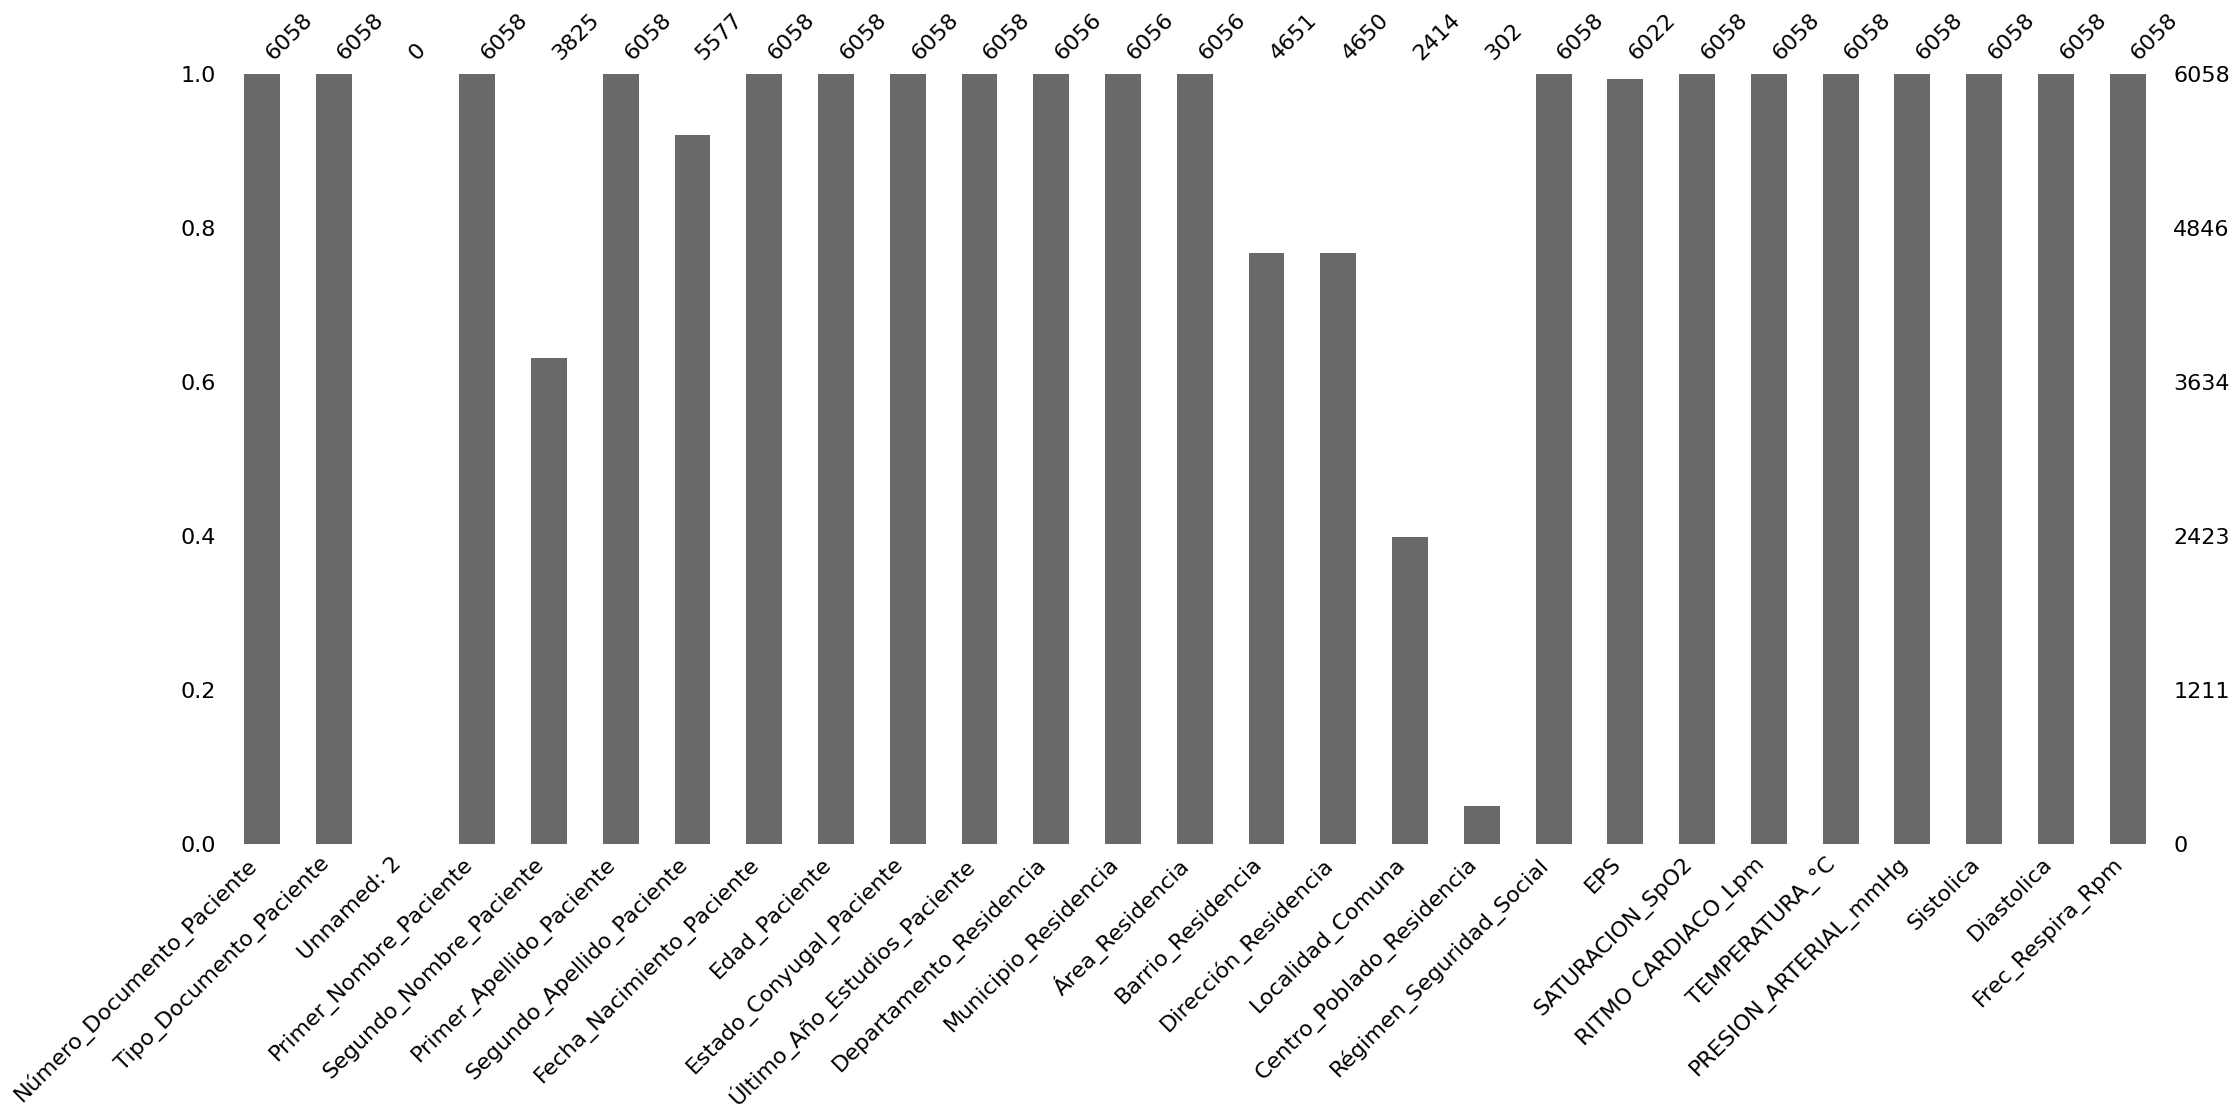

In [ ]:
# Visualizar valores nulos con un gráfico de barras
msno.bar(healthy_life_df)


<Axes: >

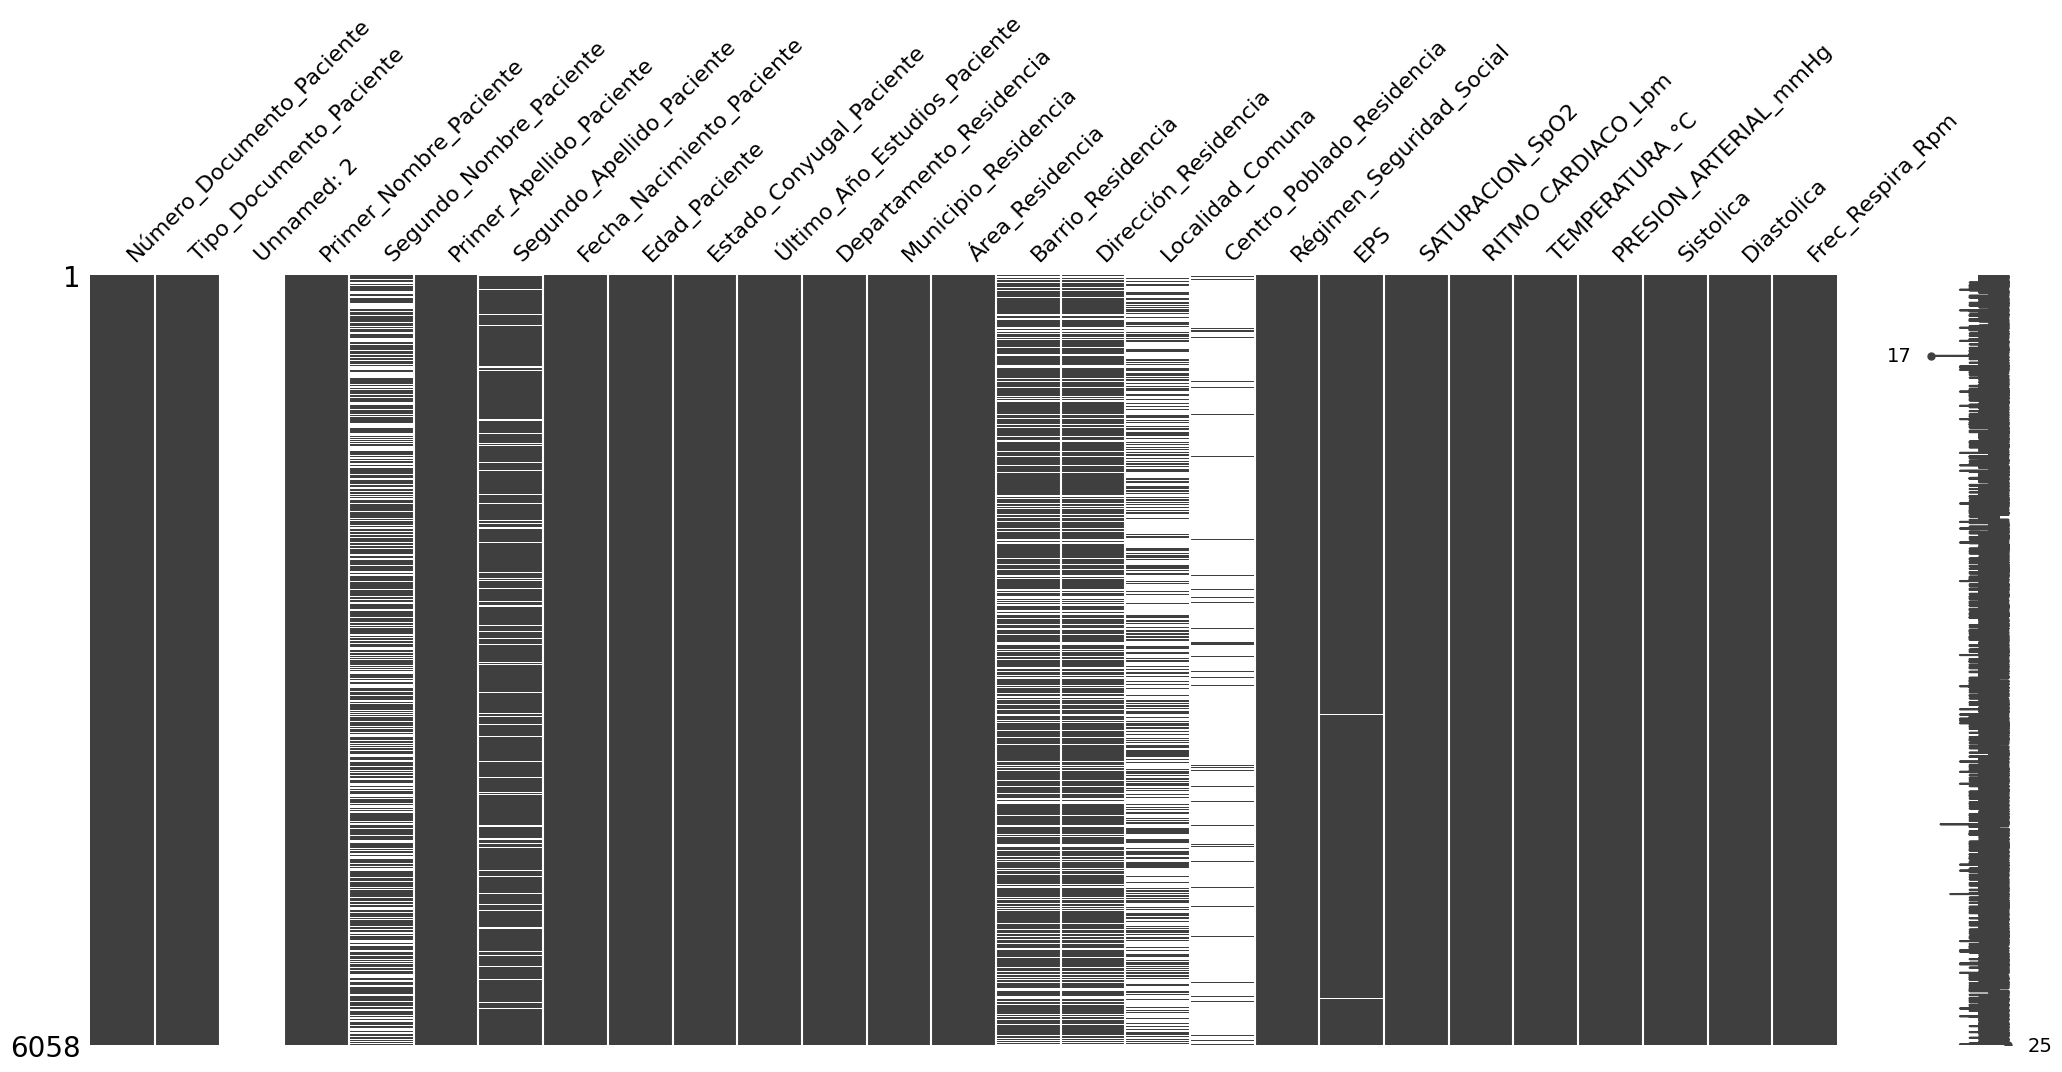

In [ ]:
# Visualizar matriz de valores faltantes
msno.matrix(healthy_life_df)

<Axes: >

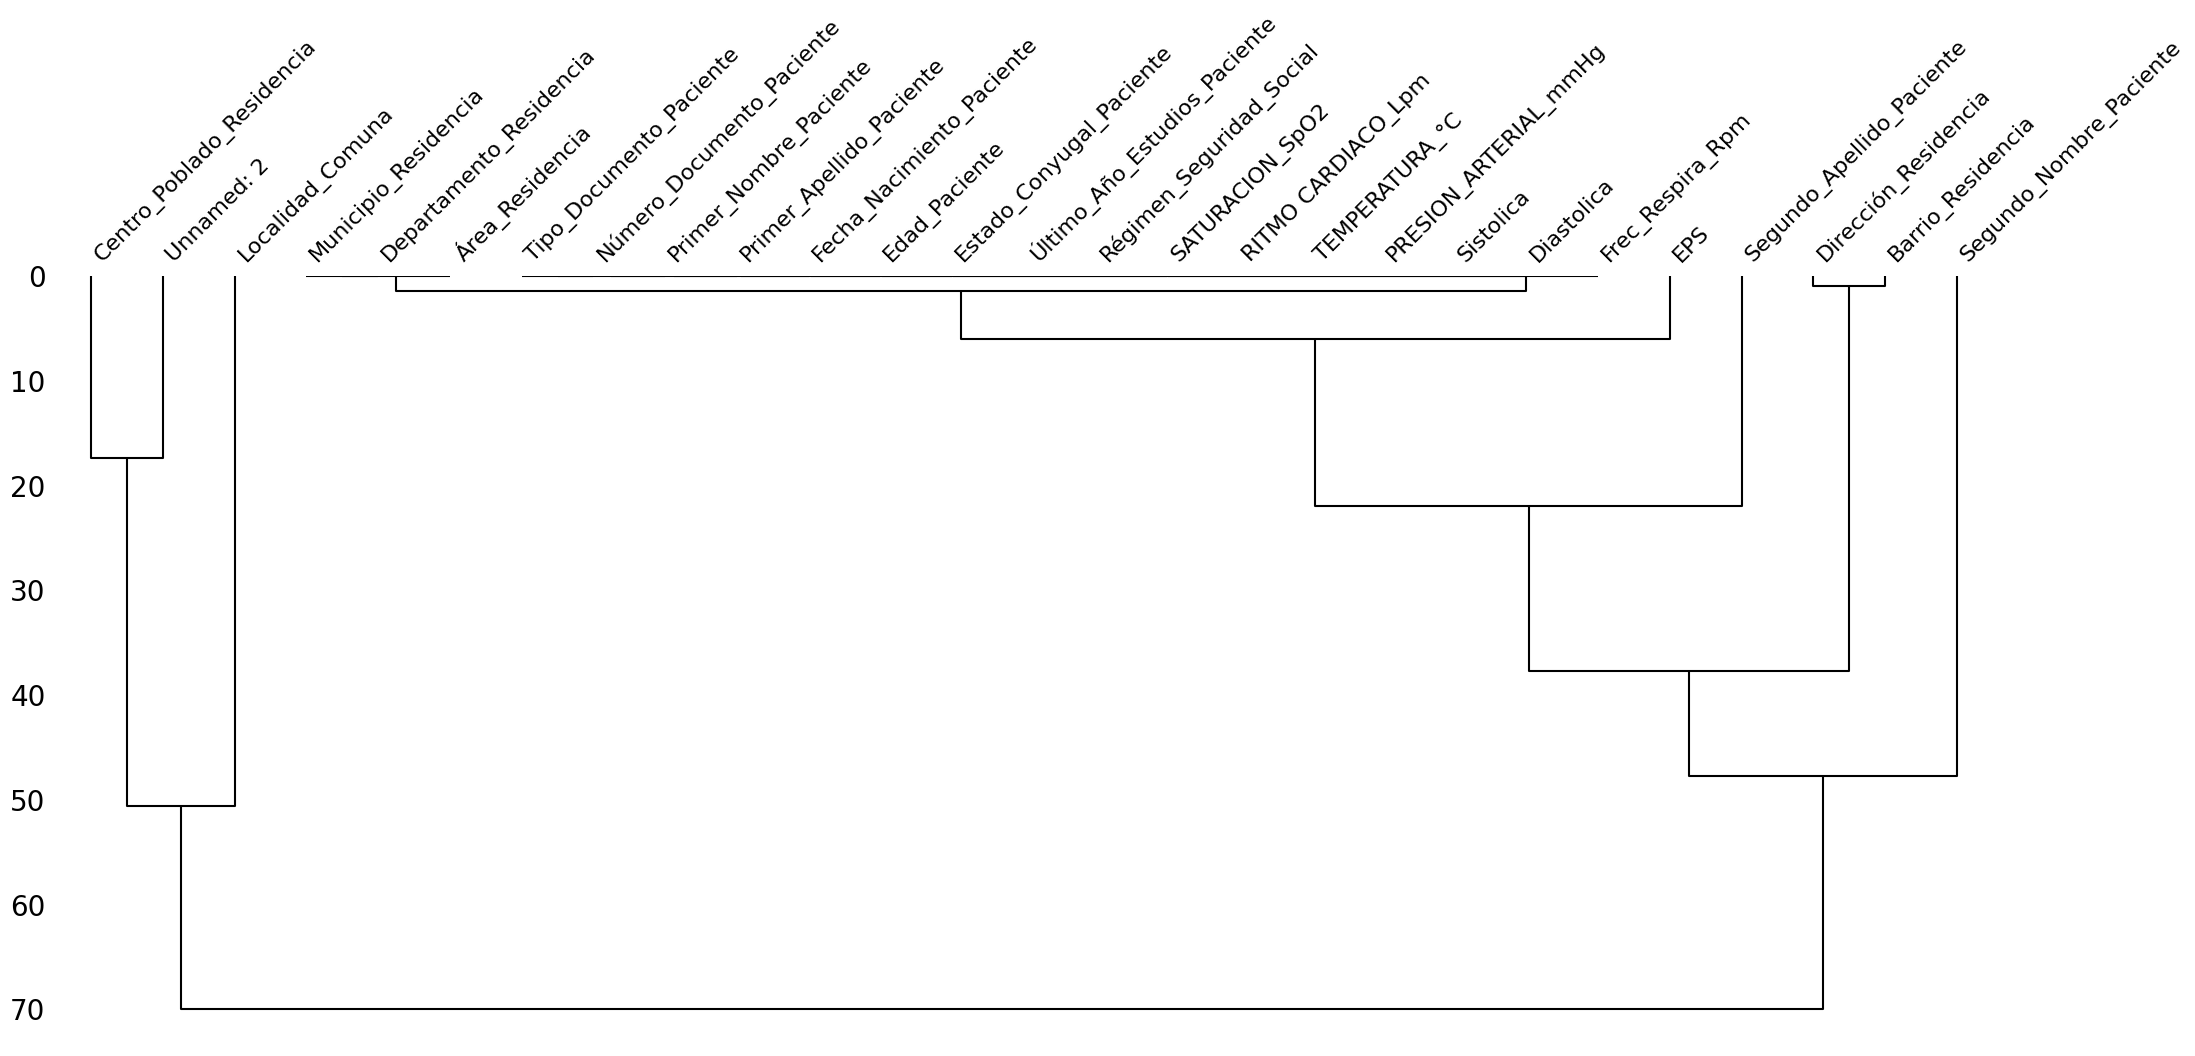

In [ ]:
# Visualizar dendrograma para identificar patrones de valores faltantes
msno.dendrogram(healthy_life_df)

# Sección 2

### Paso 3: Graficar distribuciones


*Ahora*, vamos a generar gráficos para visualizar algunas características.

In [ ]:
# @title Visualización de cantidad de atenciones por EPS
healthy_life_df['EPS'].value_counts(ascending=False) #contar cuantas veces esta y descendente el contador de numero de canciones

EPS
NUEVA EPS S.A                                                                                        1502
NUEVA EPS S.A.                                                                                       1248
SALUD TOTAL E.P.S. -CM                                                                                898
EPS Y MEDICINA PREPAGADA SURAMERICANA S.A                                                             426
SALUD TOTAL S.A.                                                                                      419
EPS Y MEDICINA PREPAGADA SURAMERICANA S.A -CM                                                         311
ASOCIACIÓN INDÍGENA DEL CAUCA - AIC                                                                   236
E.P.S. SANITAS                                                                                        185
FAMISANAR E.P.S. LTDA - CAFAM - COLSUBSIDIO -CM                                                       117
MAGISTERIO                                                                                            105
EPS SANITAS - CM                                                                                       99
NUEVA EPS S.A. -CM                                                                                     98
POLICIA NACIONAL                                                                                       64
COOPERATIVA DE SALUD Y DESARROLLO INTEGRAL ZONA SUR ORIENTAL DE CARTAGENA LTDA. - COOSALUD E.S.S.      57
SAVIA SALUD E.P.S.                                                                                     44
MALLAMAS EPSI                                                                                          33
FAMISANAR E.P.S. LTDA - CAFAM - COLSUBSIDIO                                                            30
ASMET SALUD EPS SAS                                                                                    27
FUERZAS MILITARES                                                                                      21
FONDO PASIVO SOCIAL DE LOS FERROCARRILES NACIONALES                                                    17
CAPITAL SALUD E.P.S.                                                                                    7
SERVICIO OCCIDENTAL DE SALUD - S.O.S. S.A.                                                              6
COOMEVA E.P.S. S.A.                                                                                     6
ASOCIACIÓN INDÍGENA DEL CAUCA - AIC -CM                                                                 5
COMPENSAR E.P.S.                                                                                        5
PIJAOS SALUD EPSI                                                                                       4
SALUDVIDA S.A .E.P.S                                                                                    4
CAFESALUD  E.P.S.  S.A.                                                                                 4
UNIVERSIDAD NACIONAL DE COLOMBIA                                                                        4
EMSSANAR S.A.S.                                                                                         3
COOPERATIVA DE SALUD Y DESARROLLO INTEGRAL ZONA SUR ORIENTAL DE CARTAGENA - COOSALUD E.S.S. -CM         3
EMPRESA PROMOTORA DE SALUD ECOOPSOS EPS S.A.S.                                                          3
CAJA DE COMPENSACION FAMILIAR  CAJACOPI ATLANTICO                                                       3
MEDIMAS EPS S.A.S. CONTRIBUTIVO                                                                         2
COMPENSAR E.P.S. -CM                                                                                    2
ALIANSALUD E.P.S.                                                                                       2
SALUDVIDA S.A. E.P.S.                                                                                   2
CAFESALUD E.P.S.                                                          

In [ ]:
# @title seleccionamos los 20 primeros
departamentos_residencia = 20
healthy_life_df['Departamento_Residencia'].value_counts(ascending=False).iloc[:departamentos_residencia] # : significa 0, se separan las funciones


Departamento_Residencia
CALDAS                5796
CUNDINAMARCA            71
ANTIOQUIA               64
RISARALDA               36
TOLIMA                  32
BOYACÁ                  17
VALLE DEL CAUCA         12
QUINDÍO                 12
BOGOTÁ, D.C.             6
CAUCA                    2
HUILA                    1
META                     1
NORTE DE SANTANDER       1
CHOCÓ                    1
PUTUMAYO                 1
MAGDALENA                1
CAQUETÁ                  1
ATLÁNTICO                1
Name: count, dtype: int64

In [ ]:
# @title seleccionamos todos los rangos de edad
Cantidad_por_edad = 40
healthy_life_df['Edad_Paciente'].value_counts(ascending=True).iloc[-Cantidad_por_edad:]  # primeros 40 por cantidad


Edad_Paciente
55     55
58     58
59     69
60     71
61     75
96     76
95     89
62     89
63     89
65     96
64    104
66    106
92    109
94    110
93    112
69    118
74    131
67    132
72    135
91    135
68    138
73    139
70    145
78    151
90    152
76    153
75    153
71    156
83    161
77    164
89    169
80    170
79    176
82    178
86    181
81    181
88    182
85    183
84    189
87    198
Name: count, dtype: int64

#### Visualización de la información disponible:

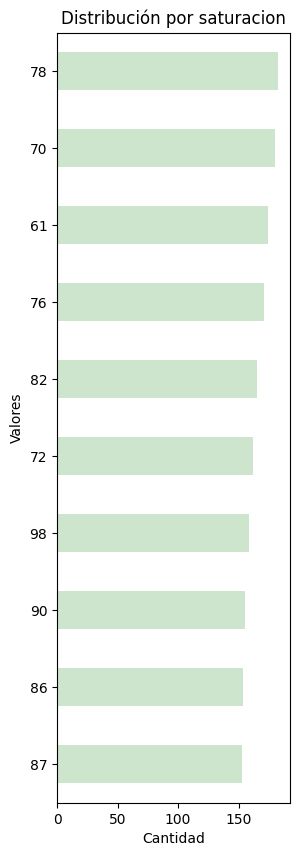

In [ ]:
# @title 3.1 Histograma de la Popularidad
# Crear el gráfico Histograma seleccionando los 10 primeros por EPS
Cantidad_por_eps = 10
healthy_life_df['SATURACION_SpO2'].value_counts().iloc[:Cantidad_por_eps].sort_values().plot(kind='barh', figsize=(3, 10), color='green', alpha=0.2) # alpha opacidad  bar  es vertical

# Agregar título y etiquetas
plt.title('Distribución por saturacion')
plt.xlabel('Cantidad')
plt.ylabel('Valores')

# Mostrar el gráfico
plt.show()

4.

In [ ]:
healthy_life_df.columns

Index(['Número_Documento_Paciente', 'Tipo_Documento_Paciente', 'Unnamed: 2',
       'Primer_Nombre_Paciente', 'Segundo_Nombre_Paciente',
       'Primer_Apellido_Paciente', 'Segundo_Apellido_Paciente',
       'Fecha_Nacimiento_Paciente', 'Edad_Paciente',
       'Estado_Conyugal_Paciente', 'Último_Año_Estudios_Paciente',
       'Departamento_Residencia', 'Municipio_Residencia', 'Área_Residencia',
       'Barrio_Residencia', 'Dirección_Residencia', 'Localidad_Comuna',
       'Centro_Poblado_Residencia', 'Régimen_Seguridad_Social', 'EPS',
       'SATURACION_SpO2', 'RITMO CARDIACO_Lpm', 'TEMPERATURA_°C',
       'PRESION_ARTERIAL_mmHg', 'Sistolica', 'Diastolica', 'Frec_Respira_Rpm'],
      dtype='object')

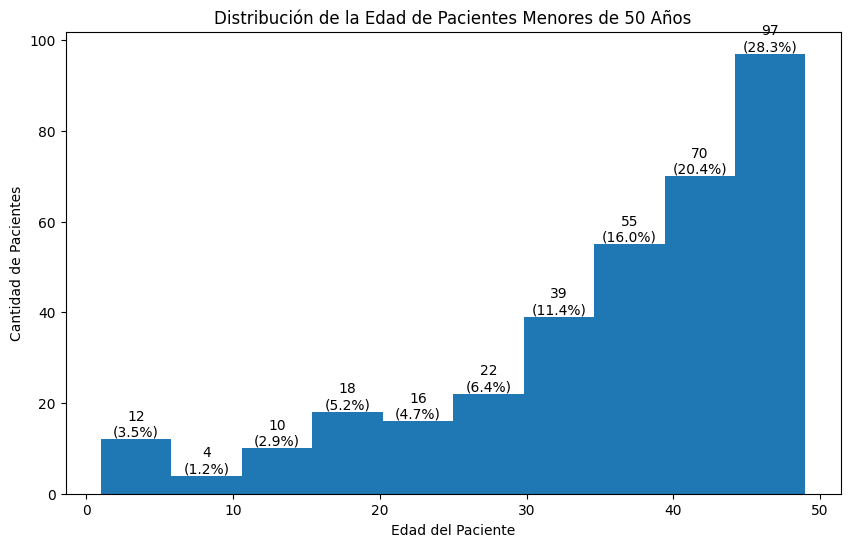

In [ ]:
# prompt: necesito una grafica que me visualice la cantidad por cada año de lo siguiente: healthy_life_df.Edad_Paciente[healthy_life_df.Edad_Paciente<50].plot(kind='hist'), colocando en un texto la cantidad que hay y su porcentaje

import numpy as np
# Assuming 'healthy_life_df' is already loaded as a pandas DataFrame.

import matplotlib.pyplot as plt

# Filter patients under 50 years old
patients_under_50 = healthy_life_df[healthy_life_df.Edad_Paciente < 50]

# Create the histogram
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
patients_under_50.Edad_Paciente.plot(kind='hist', bins=10) # Adjust number of bins as needed


# Add labels and title
plt.xlabel('Edad del Paciente')
plt.ylabel('Cantidad de Pacientes')
plt.title('Distribución de la Edad de Pacientes Menores de 50 Años')


# Annotate the plot with counts and percentages
counts, bins = np.histogram(patients_under_50.Edad_Paciente, bins=10) # Adjust number of bins as needed

for count, bin_edge in zip(counts, bins[:-1]):
    percentage = (count / len(patients_under_50)) * 100
    plt.annotate(f'{count}\n({percentage:.1f}%)', xy=(bin_edge + (bins[1]-bins[0])/2 , count),
                 ha='center', va='bottom')

# Show the plot
plt.show()


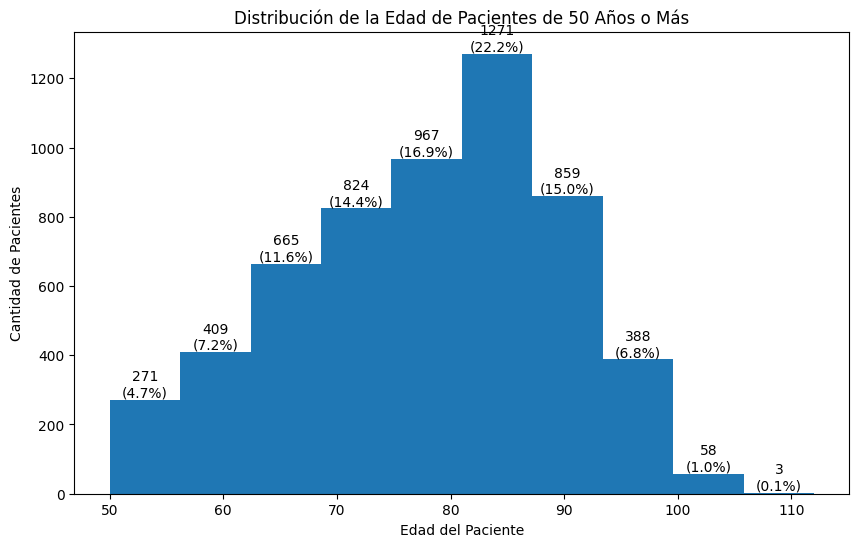

In [ ]:
# prompt: prompt: necesito una grafica que me visualice la cantidad por cada año de lo siguiente: healthy_life_df.Edad_Paciente[healthy_life_df.Edad_Paciente>= 50].plot(kind='hist'), colocando en un texto la cantidad que hay y su porcentaje

import matplotlib.pyplot as plt
import numpy as np
# Assuming 'healthy_life_df' is already loaded as a pandas DataFrame.

# Filter patients aged 50 and older
patients_50_and_older = healthy_life_df[healthy_life_df.Edad_Paciente >= 50]

# Create the histogram
plt.figure(figsize=(10, 6))
patients_50_and_older.Edad_Paciente.plot(kind='hist', bins=10)

# Add labels and title
plt.xlabel('Edad del Paciente')
plt.ylabel('Cantidad de Pacientes')
plt.title('Distribución de la Edad de Pacientes de 50 Años o Más')

# Annotate the plot with counts and percentages
counts, bins = np.histogram(patients_50_and_older.Edad_Paciente, bins=10)

for count, bin_edge in zip(counts, bins[:-1]):
    percentage = (count / len(patients_50_and_older)) * 100
    plt.annotate(f'{count}\n({percentage:.1f}%)', xy=(bin_edge + (bins[1]-bins[0])/2, count),
                 ha='center', va='bottom')

# Show the plot
plt.show()


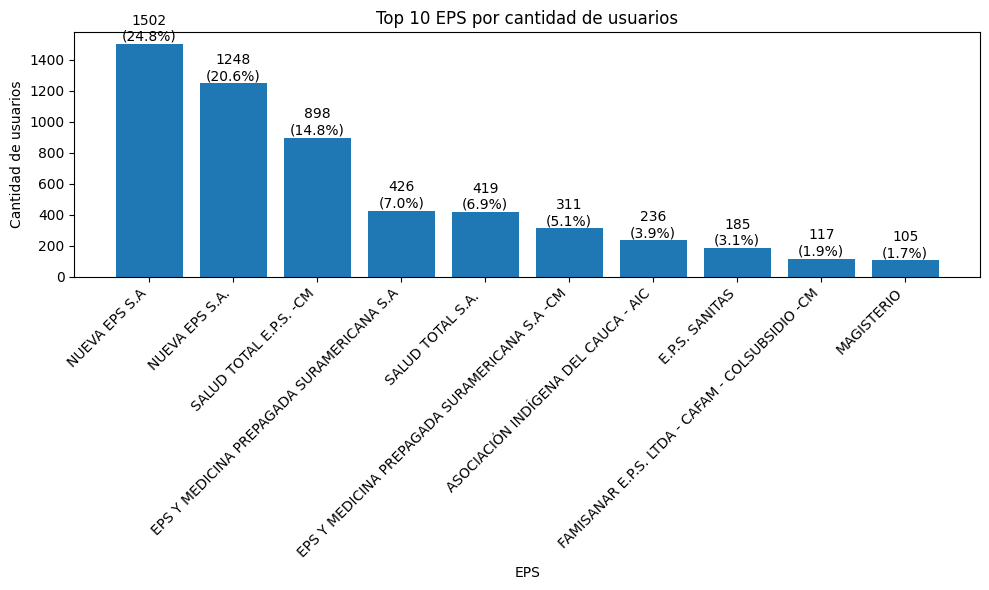

In [ ]:
# prompt: necesito una grafica que me visualice las 10 primera en cantidad de usuarios por eps asi: healthy_life_df.EPS, colocando en un texto la cantidad que hay y su porcentaje

import matplotlib.pyplot as plt

# Assuming healthy_life_df is already loaded

top_10_eps = healthy_life_df['EPS'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
bars = plt.bar(top_10_eps.index, top_10_eps.values)
plt.xlabel("EPS")
plt.ylabel("Cantidad de usuarios")
plt.title("Top 10 EPS por cantidad de usuarios")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability


# Add text annotations with counts and percentages
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval}\n({yval/len(healthy_life_df)*100:.1f}%)", ha='center', va='bottom')

plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()


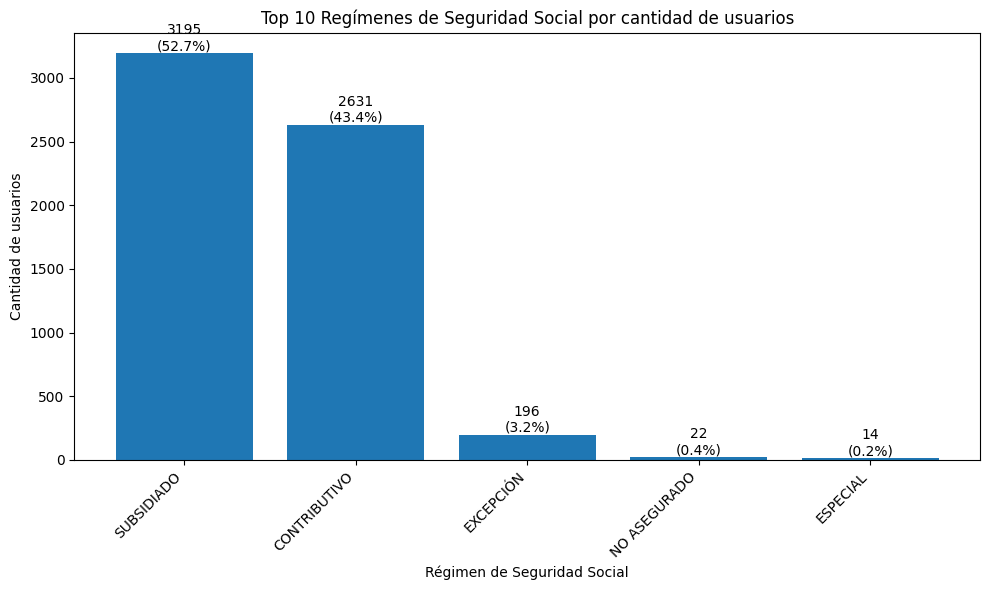

In [ ]:
# prompt: necesito una grafica que me visualice las 10 en cantidad de usuarios por Régimen_Seguridad_Social asi: healthy_life_df.Régimen_Seguridad_Social, colocando en un texto la cantidad que hay y su porcentaje

import matplotlib.pyplot as plt

# Assuming healthy_life_df is already loaded

top_10_regimen = healthy_life_df['Régimen_Seguridad_Social'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
bars = plt.bar(top_10_regimen.index, top_10_regimen.values)
plt.xlabel("Régimen de Seguridad Social")
plt.ylabel("Cantidad de usuarios")
plt.title("Top 10 Regímenes de Seguridad Social por cantidad de usuarios")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability


# Add text annotations with counts and percentages
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval}\n({yval/len(healthy_life_df)*100:.1f}%)", ha='center', va='bottom')

plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()


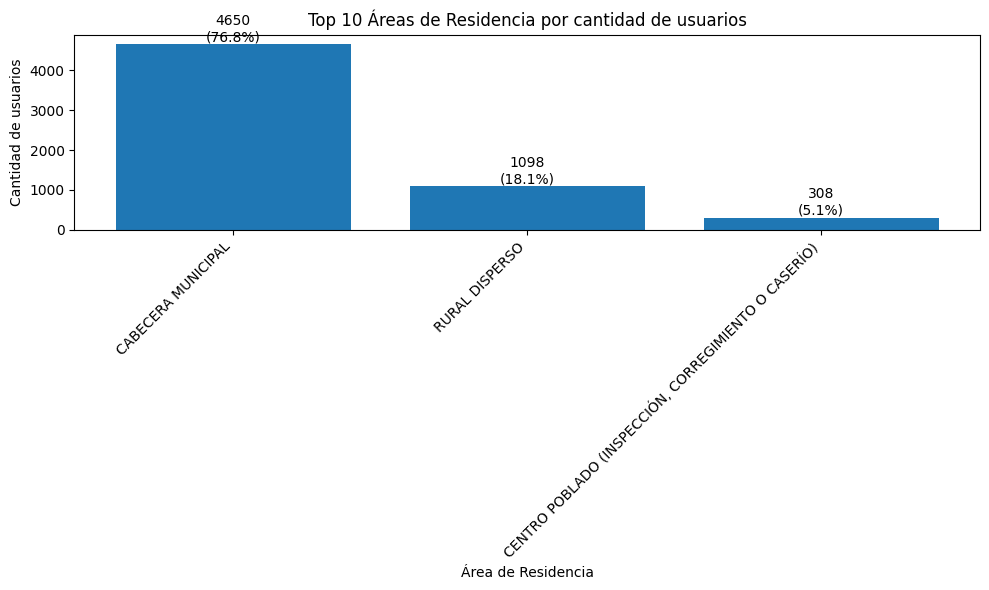

In [ ]:
# prompt: necesito una grafica que me visualice las 10 en cantidad de usuarios por Área_Residencia asi: healthy_life_df.Área_Residencia, colocando en un texto la cantidad que hay y su porcentaje

import matplotlib.pyplot as plt

# Assuming healthy_life_df is already loaded

top_10_area = healthy_life_df['Área_Residencia'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
bars = plt.bar(top_10_area.index, top_10_area.values)
plt.xlabel("Área de Residencia")
plt.ylabel("Cantidad de usuarios")
plt.title("Top 10 Áreas de Residencia por cantidad de usuarios")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability

# Add text annotations with counts and percentages
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval}\n({yval/len(healthy_life_df)*100:.1f}%)", ha='center', va='bottom')

plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()


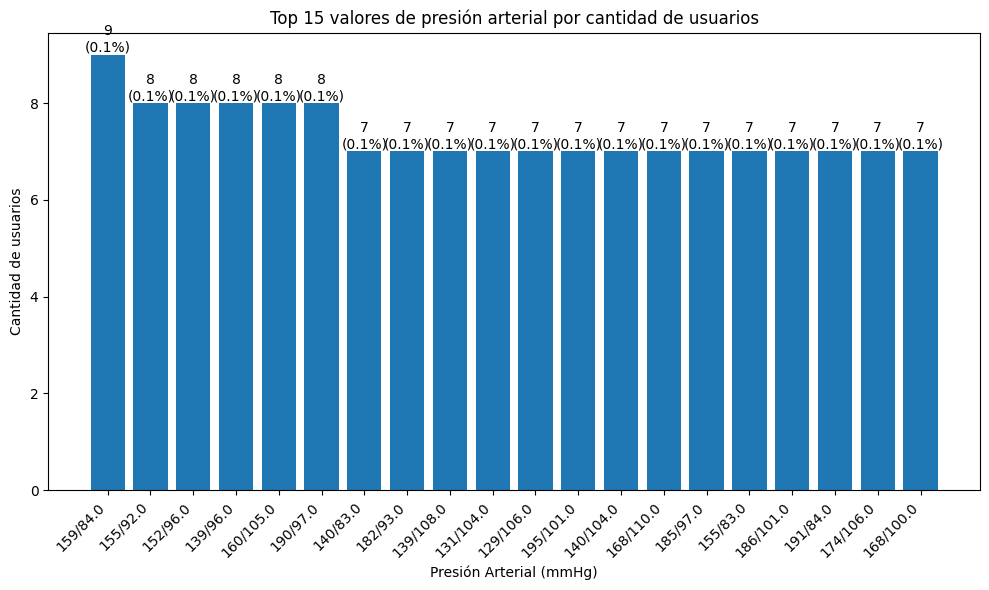

In [ ]:
# prompt: necesito una grafica que me visualice los 20 en cantidad de usuarios por PRESION_ARTERIAL_mmHg asi: healthy_life_df.PRESION_ARTERIAL_mmHg, colocando en un texto la cantidad que hay y su porcentaje

import matplotlib.pyplot as plt

# Assuming healthy_life_df is already loaded and 'PRESION_ARTERIAL_mmHg' is a numerical column

# Count occurrences of each blood pressure value
blood_pressure_counts = healthy_life_df['PRESION_ARTERIAL_mmHg'].value_counts().nlargest(20)

# Create the bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(blood_pressure_counts.index, blood_pressure_counts.values)
plt.xlabel("Presión Arterial (mmHg)")
plt.ylabel("Cantidad de usuarios")
plt.title("Top 15 valores de presión arterial por cantidad de usuarios")
plt.xticks(rotation=45, ha="right")

# Add text annotations with counts and percentages
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval}\n({yval/len(healthy_life_df)*100:.1f}%)", ha='center', va='bottom')

plt.tight_layout()
plt.show()


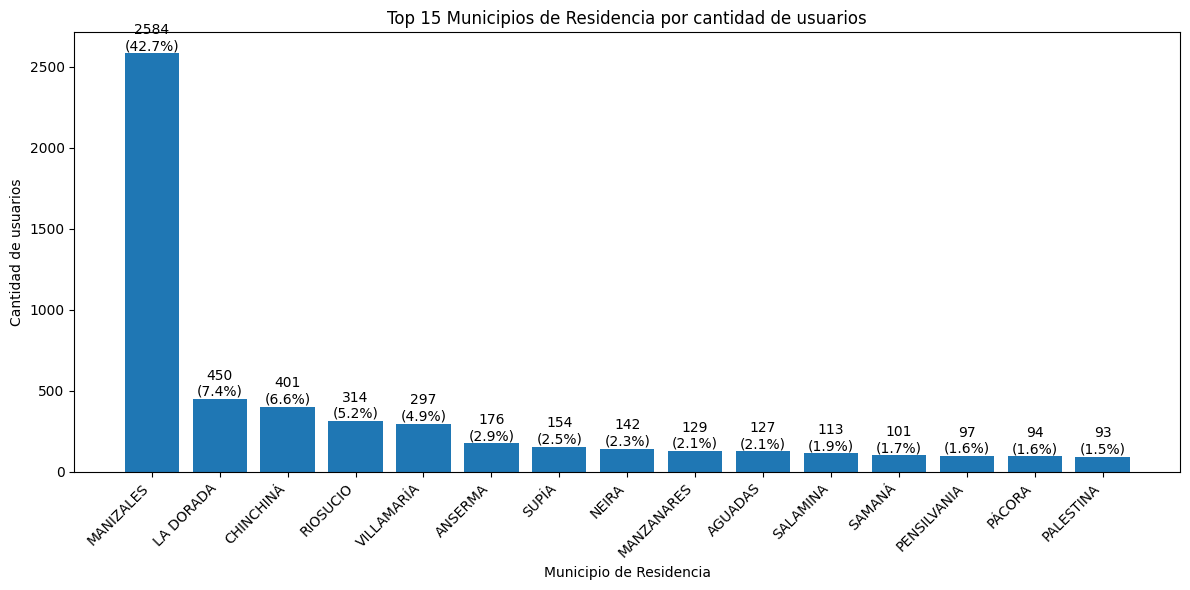

In [ ]:
# prompt: necesito una grafica que me visualice los 15 en cantidad de usuarios por Municipio_Residencia asi: healthy_life_df.Municipio_Residencia, colocando en un texto la cantidad que hay y su porcentaje

import matplotlib.pyplot as plt

# Assuming healthy_life_df is already loaded

top_15_municipios = healthy_life_df['Municipio_Residencia'].value_counts().nlargest(15)

plt.figure(figsize=(12, 6))
bars = plt.bar(top_15_municipios.index, top_15_municipios.values)
plt.xlabel("Municipio de Residencia")
plt.ylabel("Cantidad de usuarios")
plt.title("Top 15 Municipios de Residencia por cantidad de usuarios")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability

# Add text annotations with counts and percentages
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval}\n({yval/len(healthy_life_df)*100:.1f}%)", ha='center', va='bottom')

plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()


In [ ]:
#@title Seleccionar solo las columnas numéricas del DataFrame
numeric_cols = healthy_life_df.select_dtypes(include=['number'])

# Calcular la matriz de correlación
conf_matrix = numeric_cols.corr()

# Mostrar la matriz de correlación
conf_matrix


Unnamed: 2  Edad_Paciente  SATURACION_SpO2  \
Unnamed: 2                 NaN            NaN              NaN   
Edad_Paciente              NaN       1.000000         0.008498   
SATURACION_SpO2            NaN       0.008498         1.000000   
RITMO CARDIACO_Lpm         NaN      -0.001587        -0.006549   
TEMPERATURA_°C             NaN      -0.006089         0.000383   
Sistolica                  NaN      -0.013026        -0.000811   
Frec_Respira_Rpm           NaN      -0.000795         0.005515   

                    RITMO CARDIACO_Lpm  TEMPERATURA_°C  Sistolica  \
Unnamed: 2                         NaN             NaN        NaN   
Edad_Paciente                -0.001587       -0.006089  -0.013026   
SATURACION_SpO2              -0.006549        0.000383  -0.000811   
RITMO CARDIACO_Lpm            1.000000       -0.002382   0.014594   
TEMPERATURA_°C               -0.002382        1.000000  -0.009707   
Sistolica                     0.014594       -0.009707   1.000000   
Frec_Respira_Rpm              0.001186       -0.004052   0.005533   

                    Frec_Respira_Rpm  
Unnamed: 2                       NaN  
Edad_Paciente              -0.000795  
SATURACION_SpO2             0.005515  
RITMO CARDIACO_Lpm          0.001186  
TEMPERATURA_°C             -0.004052  
Sistolica                   0.005533  
Frec_Respira_Rpm            1.000000

In [ ]:
# @title Análisis exploratorio de datos (EDA)
#Configurar las opciones de visualizacion Sweetviz


sw.config_parser.read_string("""
                              [Output_Defaults]
                              html_layout = widescreen
                              html_scale = 1.0
                              notebook_layout = widescreen
                              notebook_scale = 0.9
                              notebook_width = 100%
                              notebook_height = 700
                              [Layout]
                              show_logo = 0
                              """)
nombre = 'base_de_datos_triage'
healthy_life_df['Barrio_Residencia'] = healthy_life_df['Barrio_Residencia'].astype(str)
healthy_life_df['Número_Documento_Paciente'] = healthy_life_df['Número_Documento_Paciente'].astype(str)
healthy_life_df['Dirección_Residencia'] = healthy_life_df['Dirección_Residencia'].astype(str)
# Cambiar los valores de 'pendiente' a 'completado' en la columna 'estado'
healthy_life_df['EPS'] = healthy_life_df['EPS'].replace('NUEVA EPS S.A', 'NUEVA EPS S.A.')
healthy_life_df['EPS'] = healthy_life_df['EPS'].replace('NUEVA EPS S.A. -CM', 'NUEVA EPS S.A.')
healthy_life_df['Edad_Paciente'] = healthy_life_df['Edad_Paciente'].replace(2023, 89)

advert_report = sw.analyze([healthy_life_df, nombre]) # Realizamos el análisis de la base de datos inicial

#@markdown Guardar y mostrar reporte formato HTML
advert_report.show_html('EDA_df.html')

#@markdown Descarga y abre el reporte en una nueva pestaña del navegador
almacenar_archivo = input('Alamcenar archivo Si o No: ').title()
if almacenar_archivo == 'Si':
  files.download('/content/EDA_df.html')

                                             |          | [  0%]   00:00 -> (? left)

Report EDA_df.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
Alamcenar archivo Si o No: Si


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#@title La función advert_report.show_notebook en Sweetviz muestra el reporte de análisis exploratorio de datos (EDA) en un notebook Jupyter.

# Parámetros:

# layout: ajusta el diseño ( 'widescreen' o 'full screen' )
# w y h: ajusta el ancho y alto en píxeles
# scale: ajusta el tamaño (0.9 = 90% de la resolución original)
advert_report.show_notebook(layout='widescreen', w=1500, h=500, scale=0.9)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#@title La función advert_report.show_notebook muestra el reporte de análisis exploratorio de datos (EDA) en un notebook Jupyter, con el siguiente formato:

# layout='vertical': muestra los datos en una columna vertical
# w=1400 y h=500: ajusta el ancho y alto del reporte a 1400x500 píxeles
# scale=0.9: muestra el reporte a un 90% de su tamaño original
advert_report.show_notebook(layout='vertical', w=1400, h=500, scale=0.9)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#@title Calcular la media de la columna 'bpm'
saturacion = healthy_life_df.SATURACION_SpO2.mean()        #bpm.mean()
print(saturacion)
# Seleccionar registros por encima de la media
registros_encima_media = healthy_life_df[healthy_life_df.SATURACION_SpO2 > saturacion]

# Seleccionar registros por debajo de la media
registros_debajo_media = healthy_life_df[healthy_life_df.SATURACION_SpO2 < saturacion]

# Mostrar la cantidad de registros en cada grupo
print(f"Registros por encima de la media: {len(registros_encima_media)}")
print(f"Registros por debajo de la media: {len(registros_debajo_media)}")

# Puedes trabajar con estos nuevos DataFrames 'registros_encima_media' y 'registros_debajo_media'
# para realizar análisis específicos sobre los registros que cumplen cada condición.


79.86579729283592
Registros por encima de la media: 3048
Registros por debajo de la media: 3010


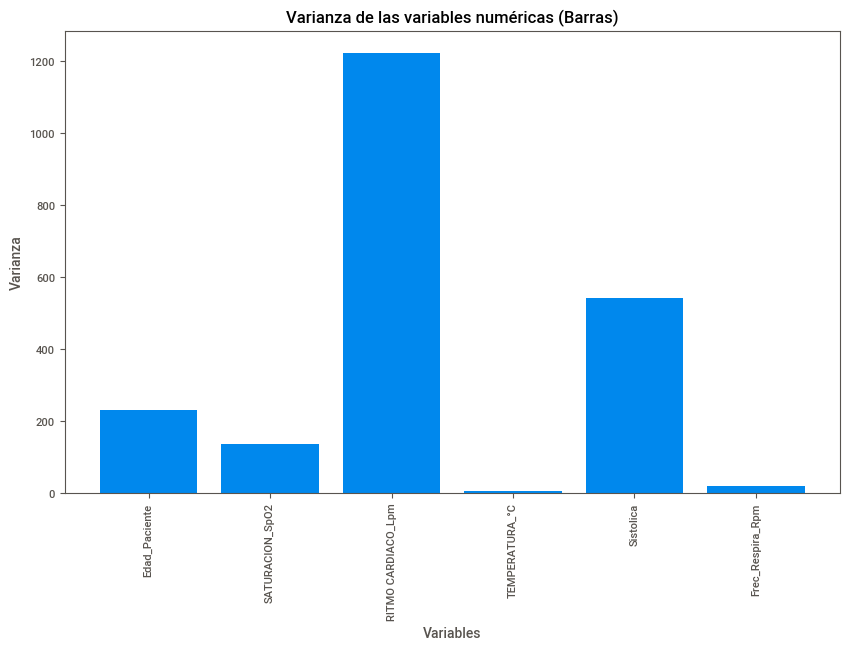

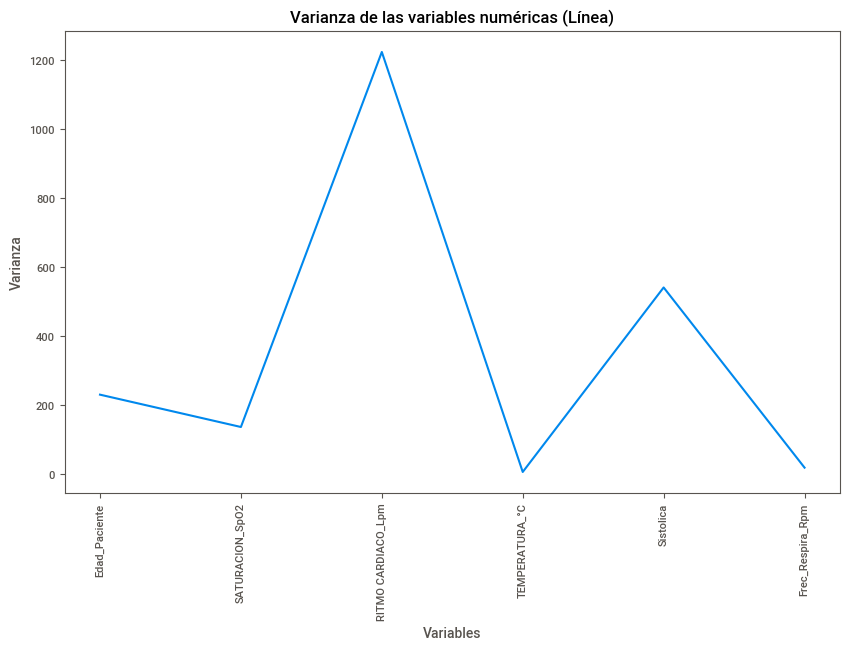

In [ ]:
#@title visualizar la varianza de las variables numericas con numeric_cols.var() en barras y en linea juntas

# Calcular la varianza de las columnas numéricas
variance = numeric_cols.var()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(variance.index, variance.values)
plt.title('Varianza de las variables numéricas (Barras)')
plt.xlabel('Variables')
plt.ylabel('Varianza')
plt.xticks(rotation=90)
plt.show()

# Crear el gráfico de línea
plt.figure(figsize=(10, 6))
plt.plot(variance.index, variance.values)
plt.title('Varianza de las variables numéricas (Línea)')
plt.xlabel('Variables')
plt.ylabel('Varianza')
plt.xticks(rotation=90)
plt.show()


In [ ]:
# @title selección de columnas con mayor varianza
numeric_cols.loc[:, numeric_cols.var() > numeric_cols.var().quantile(0.75)]

RITMO CARDIACO_Lpm  Sistolica
0                     81        124
1                     97        159
2                     83        161
3                    185        200
4                    142        154
...                  ...        ...
6053                  96        189
6054                 183        125
6055                 110        144
6056                 142        149
6057                 185        151

[6058 rows x 2 columns]

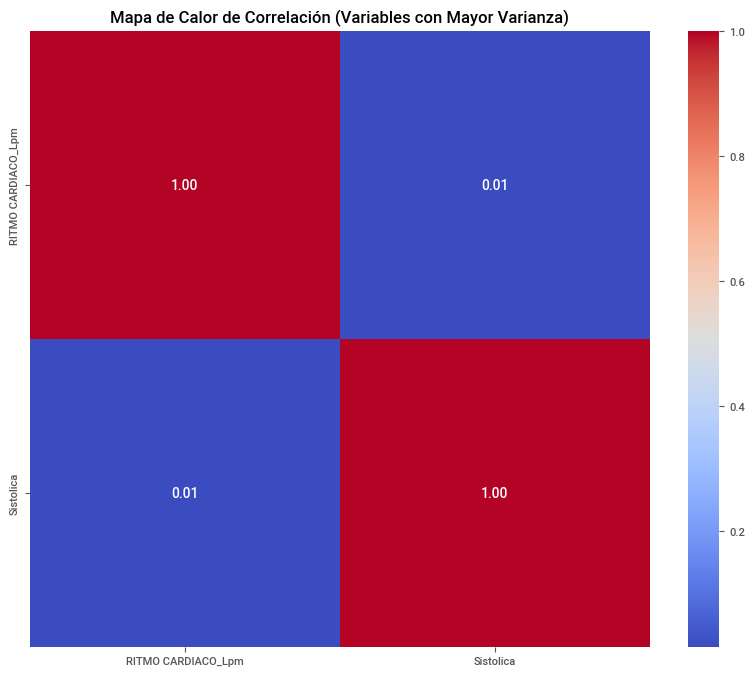

In [ ]:
#@title visualizar mapa de calor entre 2 variables numericas, con mayor variabilidad

# Seleccionar las columnas numéricas con mayor varianza
numeric_cols_high_variance = numeric_cols.loc[:, numeric_cols.var() > numeric_cols.var().quantile(0.75)]

# Calcular la matriz de correlación para las columnas seleccionadas
correlation_matrix_high_variance = numeric_cols_high_variance.corr()

# Crear el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_high_variance, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de Correlación (Variables con Mayor Varianza)')
plt.show()


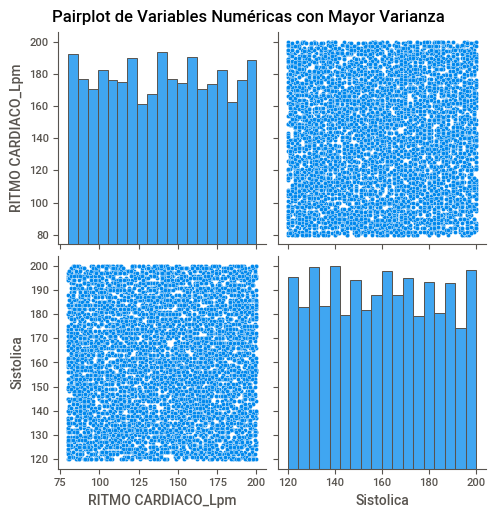

In [ ]:
# @title graficas para variables numéricas lo siguiente sns.pairplot(tips) y que seleccione una cantidad de variables con mayor variación

# Seleccionar las columnas numéricas con mayor varianza
numeric_cols_high_variance = numeric_cols.loc[:, numeric_cols.var() > numeric_cols.var().quantile(0.75)]

# Crear el pairplot con Seaborn para las columnas seleccionadas
sns.pairplot(numeric_cols_high_variance)
plt.suptitle('Pairplot de Variables Numéricas con Mayor Varianza', y=1.02)
plt.show()


# Sección 3 Modelo

In [ ]:
# prompt: necesito eliminar las columnas que tengan en un 20% o mayor de vacios en la variable healthy_life_df, y la guarda en una nueva variable

# Calculate the percentage of missing values in each column
missing_percentage = healthy_life_df.isnull().sum() / len(healthy_life_df) * 100

# Identify columns with 20% or more missing values
columns_to_drop = missing_percentage[missing_percentage >= 20].index

# Create a new DataFrame without the identified columns
new_healthy_life_df = healthy_life_df.drop(columns=columns_to_drop)


In [ ]:
columns_to_drop

Index(['Unnamed: 2', 'Segundo_Nombre_Paciente', 'Localidad_Comuna',
       'Centro_Poblado_Residencia'],
      dtype='object')

In [ ]:
new_healthy_life_df.isna().sum()

Número_Documento_Paciente         0
Tipo_Documento_Paciente           0
Primer_Nombre_Paciente            0
Primer_Apellido_Paciente          0
Segundo_Apellido_Paciente       481
Fecha_Nacimiento_Paciente         0
Edad_Paciente                     0
Estado_Conyugal_Paciente          0
Último_Año_Estudios_Paciente      0
Departamento_Residencia           2
Municipio_Residencia              2
Área_Residencia                   2
Barrio_Residencia                 0
Dirección_Residencia              0
Régimen_Seguridad_Social          0
EPS                              36
SATURACION_SpO2                   0
RITMO CARDIACO_Lpm                0
TEMPERATURA_°C                    0
PRESION_ARTERIAL_mmHg             0
Sistolica                         0
Diastolica                        0
Frec_Respira_Rpm                  0
dtype: int64

In [ ]:
new_healthy_life_df.columns

Index(['Número_Documento_Paciente', 'Tipo_Documento_Paciente',
       'Primer_Nombre_Paciente', 'Primer_Apellido_Paciente',
       'Segundo_Apellido_Paciente', 'Fecha_Nacimiento_Paciente',
       'Edad_Paciente', 'Estado_Conyugal_Paciente',
       'Último_Año_Estudios_Paciente', 'Departamento_Residencia',
       'Municipio_Residencia', 'Área_Residencia', 'Barrio_Residencia',
       'Dirección_Residencia', 'Régimen_Seguridad_Social', 'EPS',
       'SATURACION_SpO2', 'RITMO CARDIACO_Lpm', 'TEMPERATURA_°C',
       'PRESION_ARTERIAL_mmHg', 'Sistolica', 'Diastolica', 'Frec_Respira_Rpm'],
      dtype='object')

In [ ]:
columnas_seleccionadas = ['Tipo_Documento_Paciente',
       'Edad_Paciente', 'Estado_Conyugal_Paciente',
       'Último_Año_Estudios_Paciente', 'Departamento_Residencia',
       'Municipio_Residencia', 'Área_Residencia', 'Régimen_Seguridad_Social',
       'EPS', 'SATURACION_SpO2', 'RITMO CARDIACO_Lpm', 'TEMPERATURA_°C',
       'PRESION_ARTERIAL_mmHg', 'Diastolica','Sistolica', 'Frec_Respira_Rpm']
healthy_life_df_columnas_seleccionadas = new_healthy_life_df[columnas_seleccionadas]

In [ ]:
healthy_life_df_columnas_seleccionadas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6058 entries, 0 to 6057
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Tipo_Documento_Paciente       6058 non-null   object
 1   Edad_Paciente                 6058 non-null   int64 
 2   Estado_Conyugal_Paciente      6058 non-null   object
 3   Último_Año_Estudios_Paciente  6058 non-null   object
 4   Departamento_Residencia       6056 non-null   object
 5   Municipio_Residencia          6056 non-null   object
 6   Área_Residencia               6056 non-null   object
 7   Régimen_Seguridad_Social      6058 non-null   object
 8   EPS                           6022 non-null   object
 9   SATURACION_SpO2               6058 non-null   int64 
 10  RITMO CARDIACO_Lpm            6058 non-null   int64 
 11  TEMPERATURA_°C                6058 non-null   int64 
 12  PRESION_ARTERIAL_mmHg         6058 non-null   object
 13  Diastolica        

In [ ]:
# prompt: necesito que varifiques en que columnas hay vacios y coloques en los campos que estan vacios con 'SN'

# Replace empty values with 'SN' in specified columns
columns_to_fill = ['Tipo_Documento_Paciente', 'Estado_Conyugal_Paciente', 'Último_Año_Estudios_Paciente',
                   'Departamento_Residencia', 'Municipio_Residencia', 'Área_Residencia',
                   'Régimen_Seguridad_Social', 'EPS']

for column in columns_to_fill:
  healthy_life_df_columnas_seleccionadas[column] = healthy_life_df_columnas_seleccionadas[column].fillna('SN')

# Display updated info to verify changes
healthy_life_df_columnas_seleccionadas.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6058 entries, 0 to 6057
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Tipo_Documento_Paciente       6058 non-null   object
 1   Edad_Paciente                 6058 non-null   int64 
 2   Estado_Conyugal_Paciente      6058 non-null   object
 3   Último_Año_Estudios_Paciente  6058 non-null   object
 4   Departamento_Residencia       6058 non-null   object
 5   Municipio_Residencia          6058 non-null   object
 6   Área_Residencia               6058 non-null   object
 7   Régimen_Seguridad_Social      6058 non-null   object
 8   EPS                           6058 non-null   object
 9   SATURACION_SpO2               6058 non-null   int64 
 10  RITMO CARDIACO_Lpm            6058 non-null   int64 
 11  TEMPERATURA_°C                6058 non-null   int64 
 12  PRESION_ARTERIAL_mmHg         6058 non-null   object
 13  Diastolica        

<ipython-input-44-d6833ff69c28>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  healthy_life_df_columnas_seleccionadas[column] = healthy_life_df_columnas_seleccionadas[column].fillna('SN')


In [ ]:
# @title Análisis exploratorio de datos (EDA)
#Configurar las opciones de visualizacion Sweetviz


sw.config_parser.read_string("""
                              [Output_Defaults]
                              html_layout = widescreen
                              html_scale = 1.0
                              notebook_layout = widescreen
                              notebook_scale = 0.9
                              notebook_width = 100%
                              notebook_height = 700
                              [Layout]
                              show_logo = 0
                              """)
nombre = 'base_de_datos_triage'

advert_report = sw.analyze([healthy_life_df_columnas_seleccionadas, nombre]) # Realizamos el análisis de la base de datos inicial

#@markdown Guardar y mostrar reporte formato HTML
advert_report.show_html('EDA_df_healthy_life_df_actualizada.html')

#@markdown Descarga y abre el reporte en una nueva pestaña del navegador
almacenar_archivo = input('Alamcenar archivo Si o No: ').title()
if almacenar_archivo == 'Si':
  files.download('/content/EDA_df_healthy_life_df_actualizada.html')

                                             |          | [  0%]   00:00 -> (? left)

Report EDA_df_healthy_life_df_actualizada.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
Alamcenar archivo Si o No: Si


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
%pip install h2o
%pip install rdt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.8/265.8 MB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.46.0.6-py2.py3-none-any.whl size=265859786 sha256=964e40c73a66c8d71f81ddfc373c7f85b5c0a414dcaf2cc1e2877fe6258b350d
  Stored in directory: /root/.cache/pip/wheels/62/f9/aa/687bd54342d2981bc78e22ee9b9bc39f92006e344e7aa1e0ac
Successfully built h2o
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.5/68.5 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 23.0 MB/s eta 0:00:00


In [ ]:
# Importar librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import h2o
from h2o.estimators.kmeans import H2OKMeansEstimator
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from rdt import HyperTransformer

In [ ]:
healthy_life_df_columnas_seleccionadas.shape

(6058, 16)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.26" 2025-01-21; OpenJDK Runtime Environment (build 11.0.26+4-post-Ubuntu-1ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.26+4-post-Ubuntu-1ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.11/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpevnji9rz
  JVM stdout: /tmp/tmpevnji9rz/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpevnji9rz/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         05 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.46.0.6
H2O_cluster_version_age:    4 months and 13 days
H2O_cluster_name:           H2O_from_python_unknownUser_8e24pj
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.170 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.11.11 final
--------------------------  -----------------------------------------------------------------------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
kmeans Model Build progress: |███████████████████████████████████████████████████| (done) 100%
kmeans prediction progress: |████████████████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


kmeans Model Build progress: |███████████████████████████████████████████████████| (done) 100%
kmeans prediction progress: |████████████████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


kmeans Model Build progress: |███████████████████████████████████████████████████| (done) 100%
kmeans prediction progress: |████████████████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


kmeans Model Build progress: |███████████████████████████████████████████████████| (done) 100%
kmeans prediction progress: |████████████████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


kmeans Model Build progress: |███████████████████████████████████████████████████| (done) 100%
kmeans prediction progress: |████████████████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


kmeans Model Build progress: |███████████████████████████████████████████████████| (done) 100%
kmeans prediction progress: |████████████████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


kmeans Model Build progress: |███████████████████████████████████████████████████| (done) 100%
kmeans prediction progress: |████████████████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


kmeans Model Build progress: |███████████████████████████████████████████████████| (done) 100%
kmeans prediction progress: |████████████████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


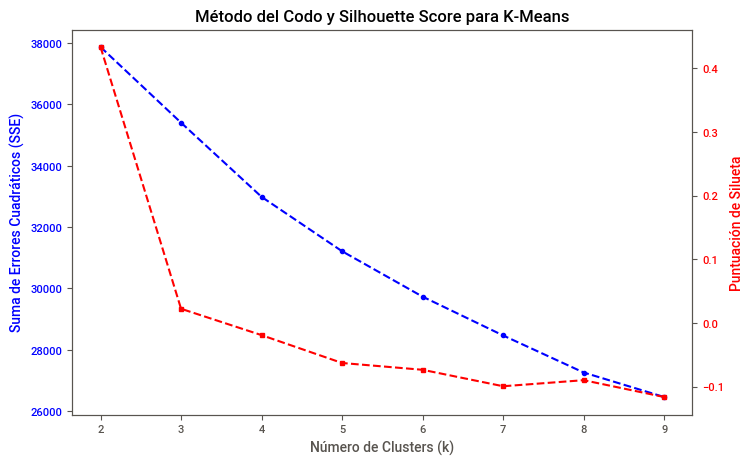

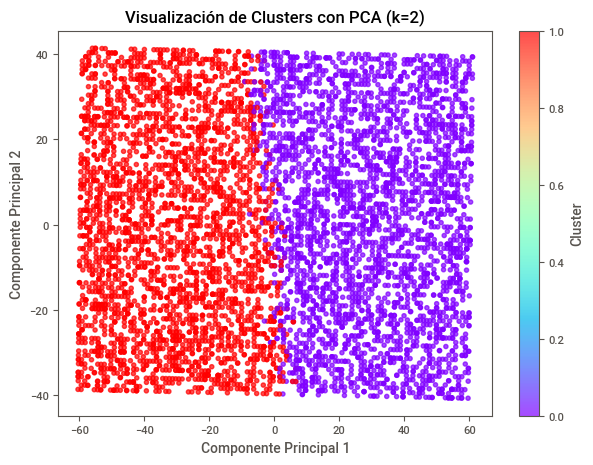

In [ ]:
# 🔹 Inicializar H2O
h2o.init()

# 1️⃣ Cargar el dataset
healthy_life_df_columnas_seleccionadas_ = healthy_life_df_columnas_seleccionadas[['RITMO CARDIACO_Lpm', 'Diastolica', 'Sistolica', 'SATURACION_SpO2', 'Frec_Respira_Rpm', 'TEMPERATURA_°C','PRESION_ARTERIAL_mmHg']]

df = healthy_life_df_columnas_seleccionadas_.copy()

# 3️⃣ Aplicar transformación con RDT 🚀
ht = HyperTransformer()
ht.detect_initial_config(df)
ht.fit(df)
df_transformed = ht.transform(df)
df_transformed = pd.DataFrame(df_transformed, columns=df.columns)

# 4️⃣ Convertir a H2OFrame 📄
df_h2o = h2o.H2OFrame(df_transformed)

# 5️⃣ Aplicar PCA y reducir a 2 dimensiones
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_transformed)

# 6️⃣ Definir valores de K a probar
k_values = range(2, 10)
sse_values = []
silhouette_values = []
cluster_results = {}

for k in k_values:
    # 🔹 Definir y entrenar K-Means en H2O
    kmeans = H2OKMeansEstimator(k=k)
    kmeans.train(x=df_h2o.columns, training_frame=df_h2o)

    # 🔹 Obtener SSE
    sse_values.append(kmeans.tot_withinss())

    # 🔹 Obtener etiquetas de clusters y calcular la silueta
    cluster_assignments = kmeans.predict(df_h2o)
    labels = h2o.as_list(cluster_assignments).values.flatten()

    silhouette_avg = silhouette_score(df_pca, labels)  # Calcular silhouette
    silhouette_values.append(silhouette_avg)

    # Guardar resultados para visualización
    cluster_results[k] = labels

# 🔹 Graficar Método del Codo y Silhouette Score
fig, ax1 = plt.subplots(figsize=(8, 5))

ax1.plot(k_values, sse_values, marker='o', linestyle='--', color='b', label='SSE')
ax1.set_xlabel('Número de Clusters (k)')
ax1.set_ylabel('Suma de Errores Cuadráticos (SSE)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.plot(k_values, silhouette_values, marker='s', linestyle='--', color='r', label='Silhouette Score')
ax2.set_ylabel('Puntuación de Silueta', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Método del Codo y Silhouette Score para K-Means')
plt.show()

# 🔹 Visualización de los Clusters en 2D (PCA)
best_k = max(cluster_results, key=lambda k: silhouette_values[k_values.index(k)])  # k con mejor silhouette
best_labels = cluster_results[best_k]

plt.figure(figsize=(7, 5))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=best_labels, cmap='rainbow', alpha=0.7)
plt.title(f'Visualización de Clusters con PCA (k={best_k})')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
# prompt: necesito que me ordenes las características con mayor relevancia luego de realizar lo siguiente:
# pca = PCA(n_components=2)
# df_pca = pca.fit_transform(df_transformed)

import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming 'healthy_life_df_columnas_seleccionadas' is your DataFrame
# and it has been preprocessed as shown in the code.
healthy_life_df_columnas_seleccionadas
# Select numerical columns for PCA
numeric_cols = healthy_life_df_columnas_seleccionadas.select_dtypes(include=['number'])

# Scale the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(numeric_cols)

# Apply PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Get explained variance ratios
explained_variance_ratio = pca.explained_variance_ratio_

# Create a DataFrame with feature importance based on explained variance
feature_importance = pd.DataFrame({'feature': numeric_cols.columns,
                                    'importance': abs(pca.components_[0])}) # Use absolute value for ranking

# Sort by importance in descending order
feature_importance = feature_importance.sort_values('importance', ascending=False)


print("Feature Importance after PCA:")
print(feature_importance)

#Now you have feature_importance sorted, so you can access the features in order of importance:
most_important_features = feature_importance["feature"].to_list()
print("\nMost important features (ordered):", most_important_features)


Feature Importance after PCA:
              feature  importance
4           Sistolica    0.650061
2  RITMO CARDIACO_Lpm    0.507953
0       Edad_Paciente    0.411982
1     SATURACION_SpO2    0.263852
3      TEMPERATURA_°C    0.232257
5    Frec_Respira_Rpm    0.161598

Most important features (ordered): ['Sistolica', 'RITMO CARDIACO_Lpm', 'Edad_Paciente', 'SATURACION_SpO2', 'TEMPERATURA_°C', 'Frec_Respira_Rpm']


In [ ]:
healthy_life_df_columnas_seleccionadas.shape

(6058, 16)

In [ ]:
pd.DataFrame(best_labels).value_counts()

0
0    3121
1    2937
Name: count, dtype: int64

In [ ]:
healthy_life_df_columnas_seleccionadas[best_labels==0]

Tipo_Documento_Paciente  Edad_Paciente  \
3       CÉDULA DE CIUDADANÍA             80   
4       CÉDULA DE CIUDADANÍA             84   
6       CÉDULA DE CIUDADANÍA             82   
8       CÉDULA DE CIUDADANÍA             95   
9       CÉDULA DE CIUDADANÍA             85   
...                      ...            ...   
6049    CÉDULA DE CIUDADANÍA             88   
6051    CÉDULA DE CIUDADANÍA             67   
6054    CÉDULA DE CIUDADANÍA             59   
6056    CÉDULA DE CIUDADANÍA             46   
6057    CÉDULA DE CIUDADANÍA             74   

                               Estado_Conyugal_Paciente  \
3                                      ESTABA CASADO(A)   
4                                       ESTABA VIUDO(A)   
6     NO ESTABA CASADO(A) Y LLEVABA DOS AÑOS O MÁS V...   
8                     ESTABA SEPARADO(A), DIVORCIADO(A)   
9                                       SIN INFORMACIÓN   
...                                                 ...   
6049                                  ESTABA SOLTERO(A)   
6051                                  ESTABA SOLTERO(A)   
6054  NO ESTABA CASADO(A) Y LLEVABA MENOS DE DOS AÑO...   
6056                                  ESTABA SOLTERO(A)   
6057                                   ESTABA CASADO(A)   

     Último_Año_Estudios_Paciente Departamento_Residencia  \
3                      PREESCOLAR                  CALDAS   
4              BÁSICA SECUNDARIA                   CALDAS   
6                 BÁSICA PRIMARIA                  CALDAS   
8                 BÁSICA PRIMARIA                  CALDAS   
9                 SIN INFORMACIÓN                  CALDAS   
...                           ...                     ...   
6049              BÁSICA PRIMARIA                  CALDAS   
6051              BÁSICA PRIMARIA                  CALDAS   
6054              BÁSICA PRIMARIA                  CALDAS   
6056              SIN INFORMACIÓN               ANTIOQUIA   
6057              BÁSICA PRIMARIA                  CALDAS   

     Municipio_Residencia                                    Área_Residencia  \
3              VILLAMARÍA                                 CABECERA MUNICIPAL   
4               MANIZALES                                 CABECERA MUNICIPAL   
6               LA DORADA                                 CABECERA MUNICIPAL   
8                  SAMANÁ                                     RURAL DISPERSO   
9               MANIZALES                                 CABECERA MUNICIPAL   
...                   ...                                                ...   
6049            LA DORADA                                 CABECERA MUNICIPAL   
6051             RIOSUCIO                                     RURAL DISPERSO   
6054            PALESTINA  CENTRO POBLADO (INSPECCIÓN, CORREGIMIENTO O CA...   
6056       PUERTO TRIUNFO                                     RURAL DISPERSO   
6057            MANIZALES                                 CABECERA MUNICIPAL   

     Régimen_Seguridad_Social                                  EPS  \
3                  SUBSIDIADO                       NUEVA EPS S.A.   
4                CONTRIBUTIVO                    SALUD TOTAL S.A.    
6                CONTRIBUTIVO                       NUEVA EPS S.A.   
8                  SUBSIDIADO               SALUD TOTAL E.P.S. -CM   
9                CONTRIBUTIVO                       NUEVA EPS S.A.   
...                       ...                                  ...   
6049               SUBSIDIADO                       NUEVA EPS S.A.   
6051               SUBSIDIADO  ASOCIACIÓN INDÍGENA DEL CAUCA - AIC   
6054             CONTRIBUTIVO                    SALUD TOTAL S.A.    
6056               SUBSIDIADO                       NUEVA EPS S.A.   
6057             CONTRIBUTIVO                       NUEVA EPS S.A.   

      SATURACION_SpO2  RITMO CARDIACO_Lpm  TEMPERATURA_°C  \
3                  99                 185              36   
4                  65                 142              38   
6            

In [ ]:
healthy_life_df_columnas_seleccionadas[best_labels==1]

Tipo_Documento_Paciente  Edad_Paciente  \
0       CÉDULA DE CIUDADANÍA             83   
1       CÉDULA DE CIUDADANÍA             67   
2       CÉDULA DE CIUDADANÍA             92   
5       CÉDULA DE CIUDADANÍA             73   
7       CÉDULA DE CIUDADANÍA             91   
...                      ...            ...   
6047    CÉDULA DE CIUDADANÍA             88   
6050    CÉDULA DE CIUDADANÍA             84   
6052    CÉDULA DE CIUDADANÍA             58   
6053    CÉDULA DE CIUDADANÍA             62   
6055    CÉDULA DE CIUDADANÍA             82   

                               Estado_Conyugal_Paciente  \
0                                     ESTABA SOLTERO(A)   
1                                      ESTABA CASADO(A)   
2                                      ESTABA CASADO(A)   
5                                      ESTABA CASADO(A)   
7                                       ESTABA VIUDO(A)   
...                                                 ...   
6047                                   ESTABA CASADO(A)   
6050                                    ESTABA VIUDO(A)   
6052                                  ESTABA SOLTERO(A)   
6053                                    SIN INFORMACIÓN   
6055  NO ESTABA CASADO(A) Y LLEVABA DOS AÑOS O MÁS V...   

     Último_Año_Estudios_Paciente Departamento_Residencia  \
0                 BÁSICA PRIMARIA                  CALDAS   
1      MEDIA ACADÉMICA O CLÁSICA                   CALDAS   
2                         NINGUNO                  CALDAS   
5                 BÁSICA PRIMARIA                  CALDAS   
7                         NINGUNO            CUNDINAMARCA   
...                           ...                     ...   
6047              BÁSICA PRIMARIA                  CALDAS   
6050              SIN INFORMACIÓN                  CALDAS   
6052              BÁSICA PRIMARIA                  CALDAS   
6053              SIN INFORMACIÓN                  CALDAS   
6055              BÁSICA PRIMARIA                  CALDAS   

     Municipio_Residencia     Área_Residencia Régimen_Seguridad_Social  \
0               MANIZALES  CABECERA MUNICIPAL             CONTRIBUTIVO   
1               CHINCHINÁ  CABECERA MUNICIPAL             CONTRIBUTIVO   
2                  PÁCORA      RURAL DISPERSO               SUBSIDIADO   
5               LA DORADA  CABECERA MUNICIPAL               SUBSIDIADO   
7           PUERTO SALGAR  CABECERA MUNICIPAL             CONTRIBUTIVO   
...                   ...                 ...                      ...   
6047            MANIZALES  CABECERA MUNICIPAL             CONTRIBUTIVO   
6050            MANIZALES  CABECERA MUNICIPAL               SUBSIDIADO   
6052            MANIZALES  CABECERA MUNICIPAL               SUBSIDIADO   
6053            MANIZALES  CABECERA MUNICIPAL             CONTRIBUTIVO   
6055            MANIZALES  CABECERA MUNICIPAL               SUBSIDIADO   

                                                    EPS  SATURACION_SpO2  \
0                                        E.P.S. SANITAS               69   
1                                     SALUD TOTAL S.A.                80   
2                                SALUD TOTAL E.P.S. -CM               96   
5                                        NUEVA EPS S.A.               91   
7     FONDO PASIVO SOCIAL DE LOS FERROCARRILES NACIO...               82   
...                                                 ...              ...   
6047                                     NUEVA EPS S.A.               76   
6050                             SALUD TOTAL E.P.S. -CM               85   
6052                                     NUEVA EPS S.A.               73   
6053          EPS Y MEDICINA PREPAGADA SURAMERICANA S.A               81   
6055                                     NUEVA EPS S.A.               82   

      RITMO CARDIACO_Lpm  TEMPERATURA_°C PRESION_ARTERIAL_mmHg Diastolica  \
0                     81              38             124/105.0      105.0   
1                     97              35  

In [ ]:
# @title Análisis exploratorio de datos (EDA)
#Configurar las opciones de visualizacion Sweetviz


sw.config_parser.read_string("""
                              [Output_Defaults]
                              html_layout = widescreen
                              html_scale = 1.0
                              notebook_layout = widescreen
                              notebook_scale = 0.9
                              notebook_width = 100%
                              notebook_height = 700
                              [Layout]
                              show_logo = 0
                              """)
nombre1 = 'base_de_datos_triage1'
nombre2 = 'base_de_datos_triage2'
nombre3 = 'base_de_datos_triage3'

advert_report = sw.compare([healthy_life_df_columnas_seleccionadas[best_labels==0], nombre1], [healthy_life_df_columnas_seleccionadas[best_labels==1], nombre2]) # Realizamos el análisis de la base de datos inicial

#@markdown Guardar y mostrar reporte formato HTML
advert_report.show_html('EDA_df_healthy_life_df_actualizada.html')

#@markdown Descarga y abre el reporte en una nueva pestaña del navegador
almacenar_archivo = input('Alamcenar archivo Si o No: ').title()
if almacenar_archivo == 'Si':
  files.download('/content/EDA_df_healthy_life_df_actualizada.html')

                                             |          | [  0%]   00:00 -> (? left)

Report EDA_df_healthy_life_df_actualizada.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
Alamcenar archivo Si o No: Si


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


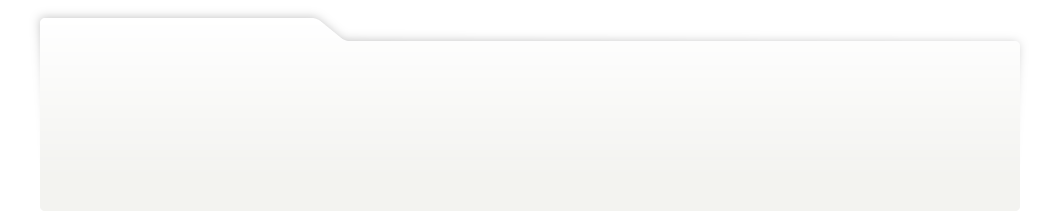
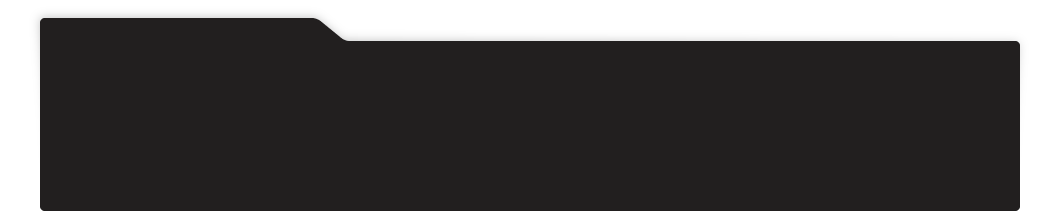
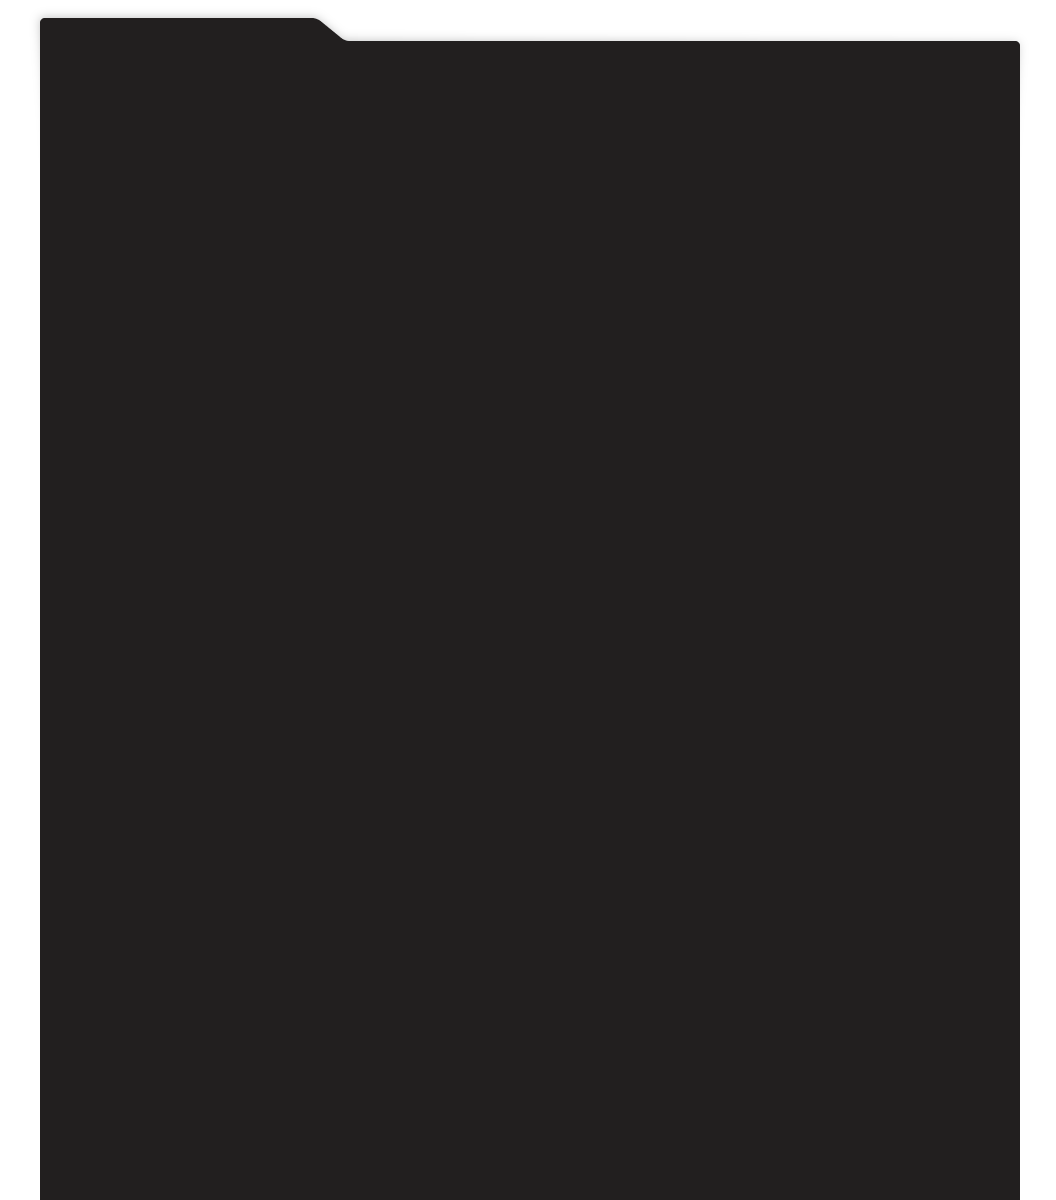
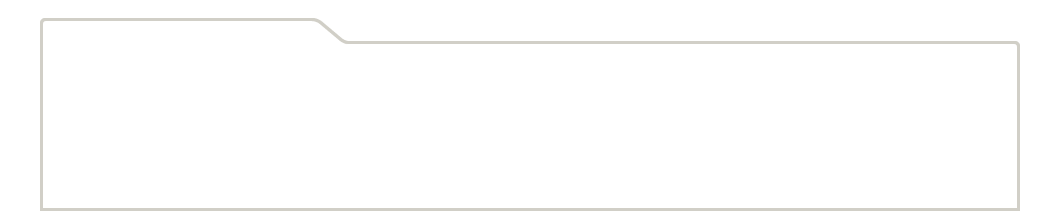
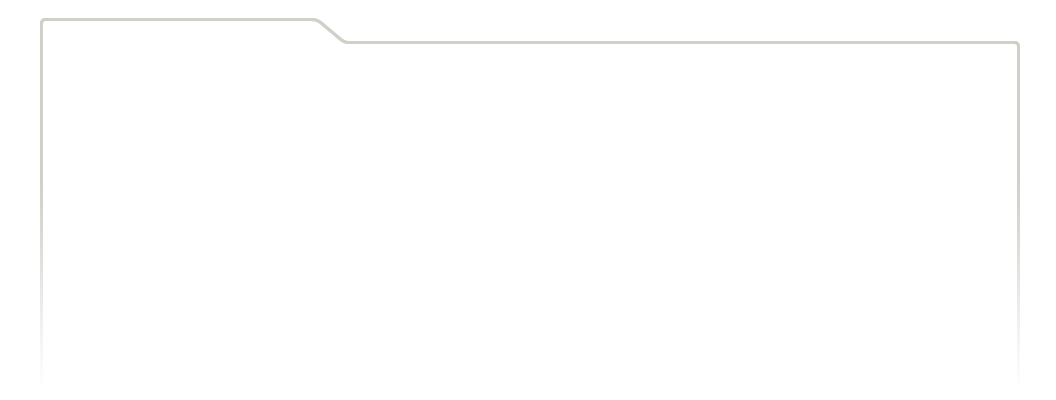
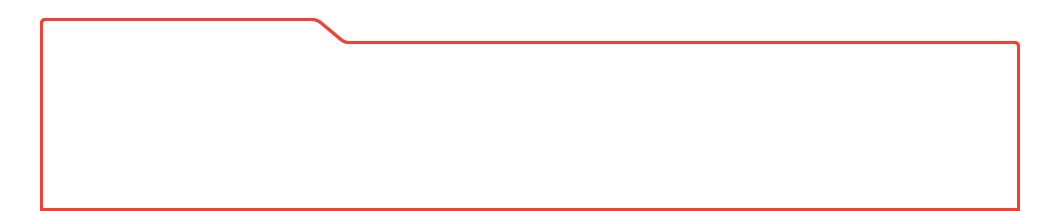
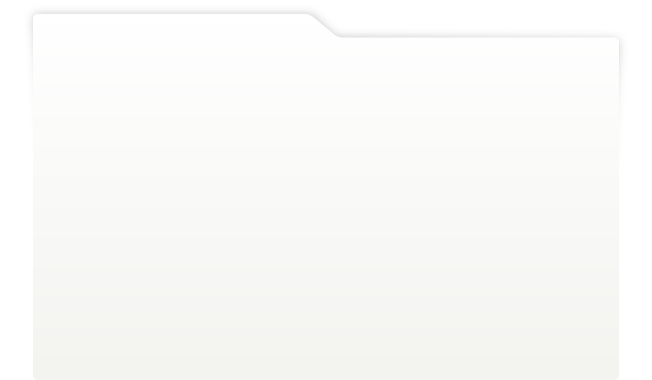
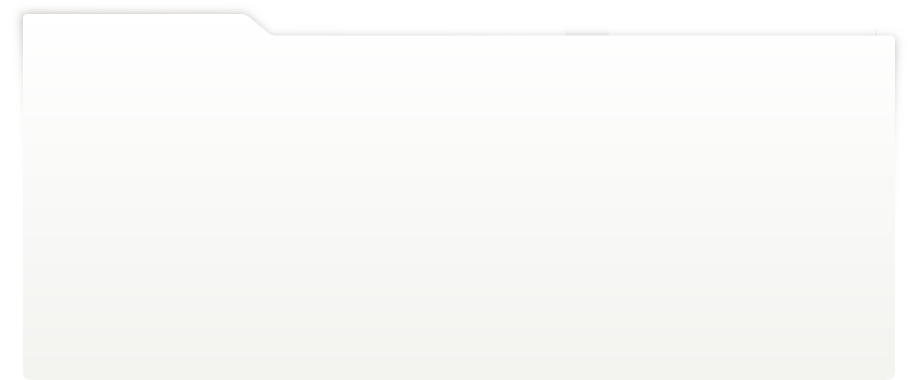
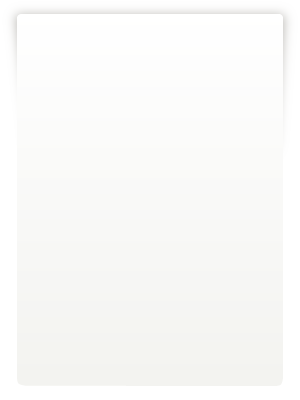
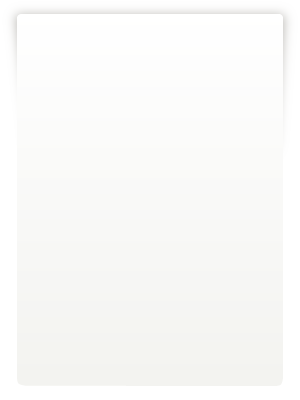
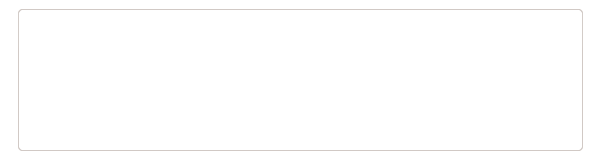
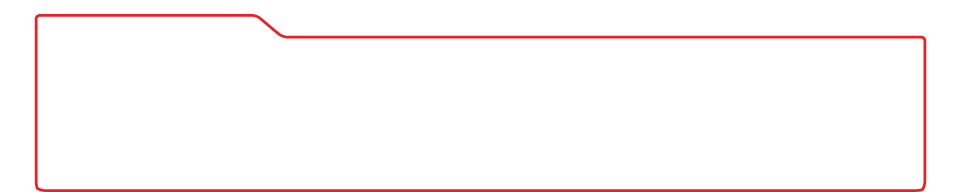
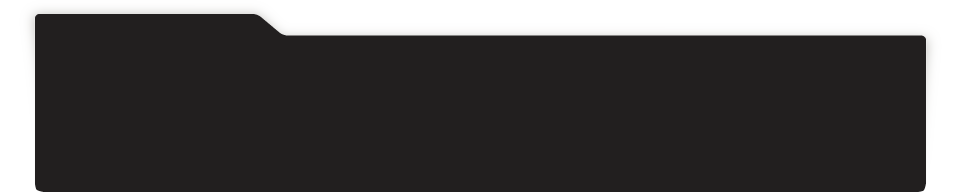
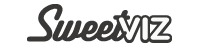
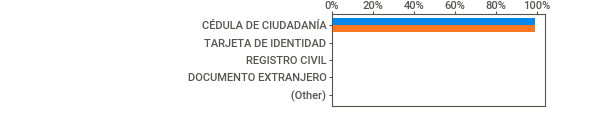
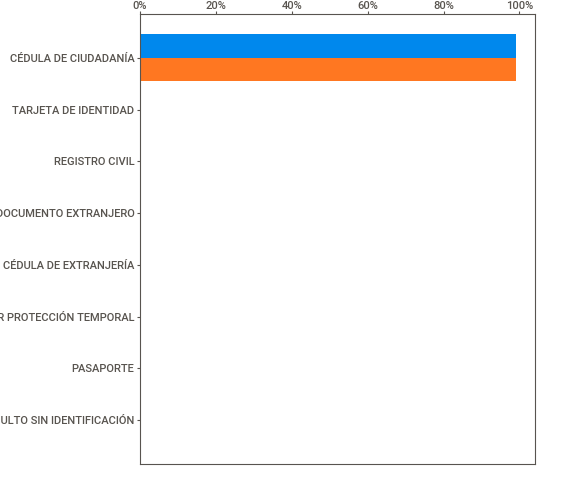
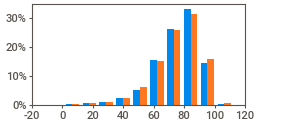
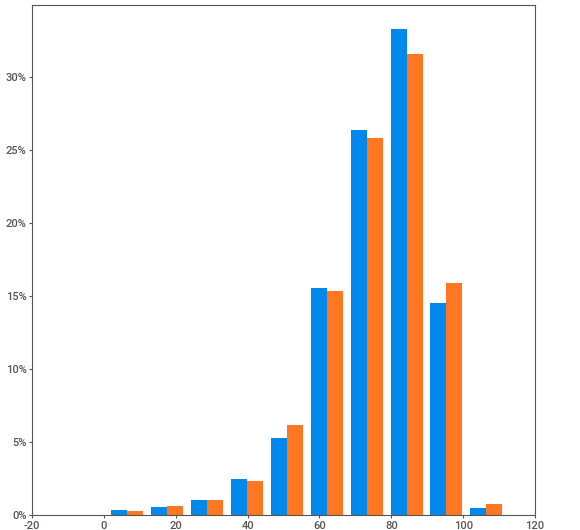
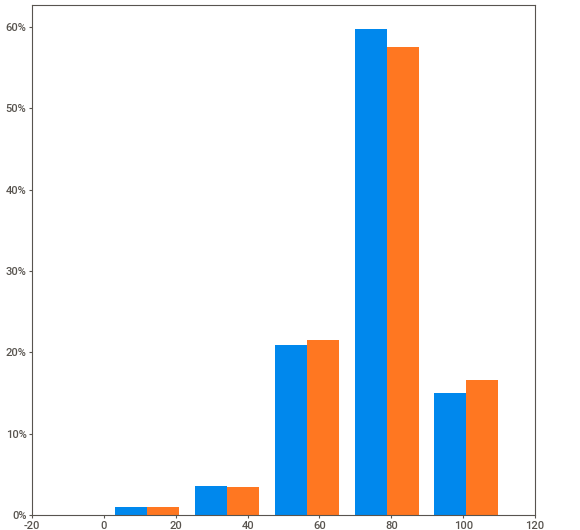
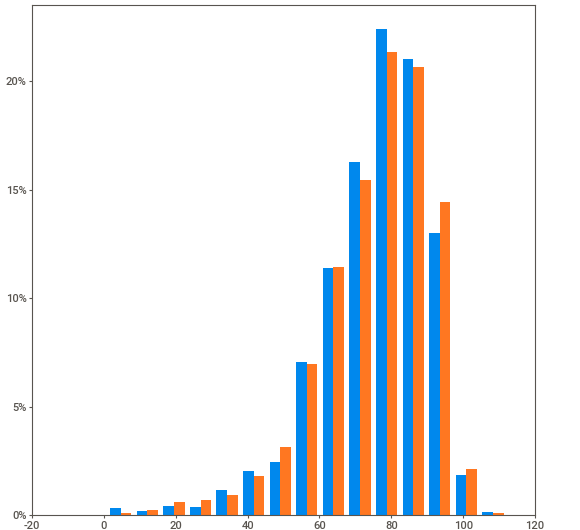
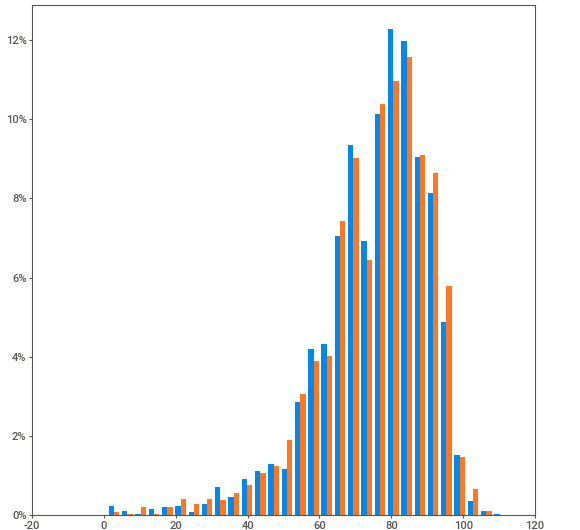
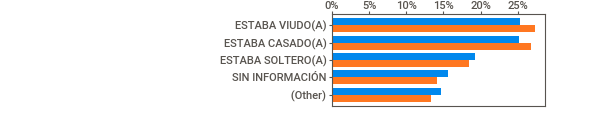
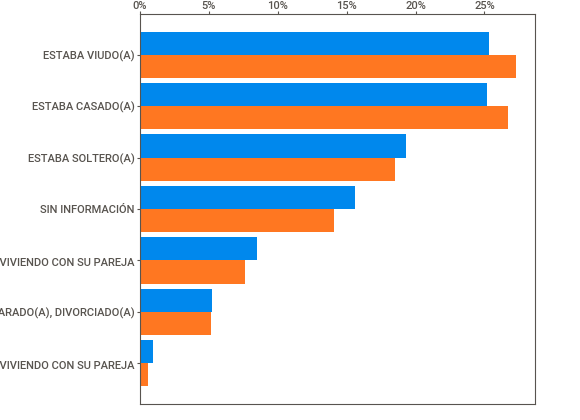
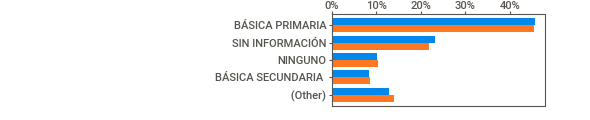
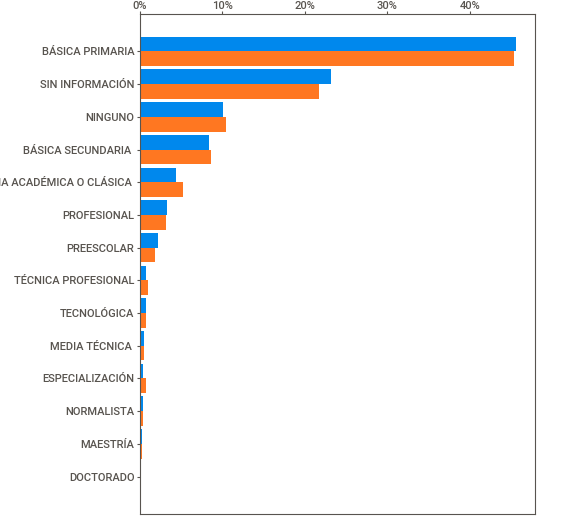
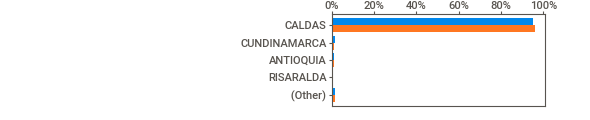
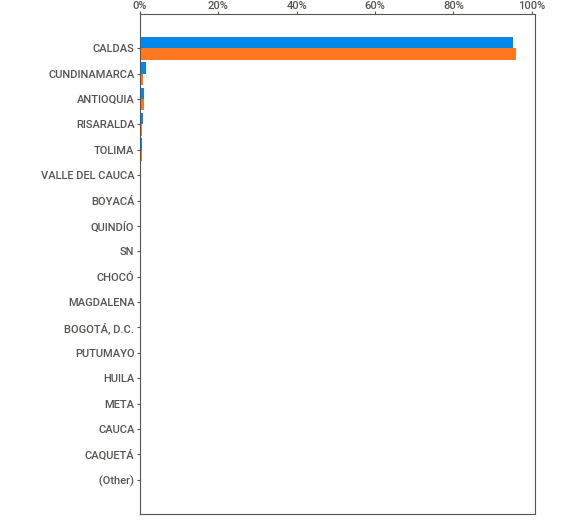
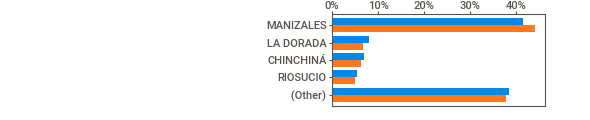
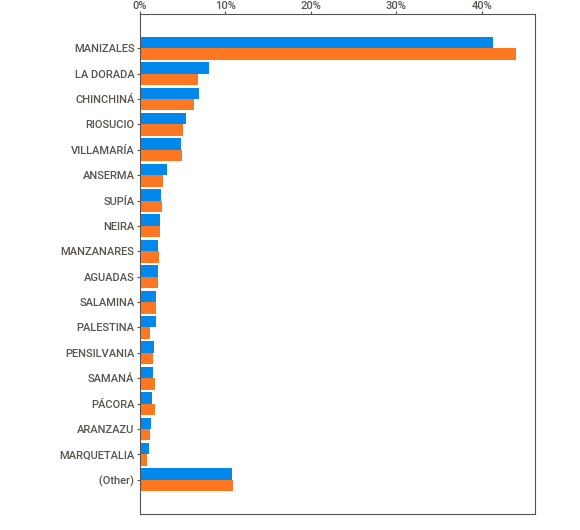
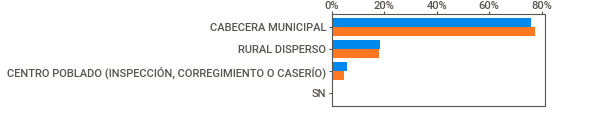
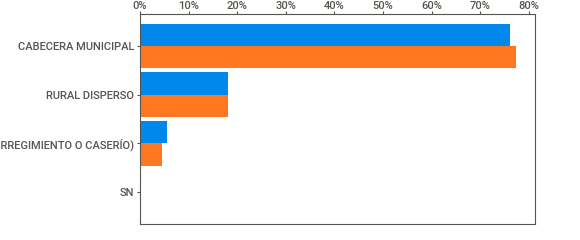
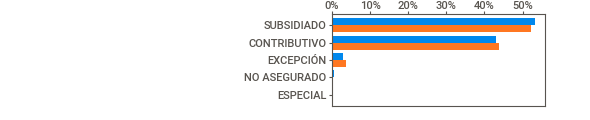
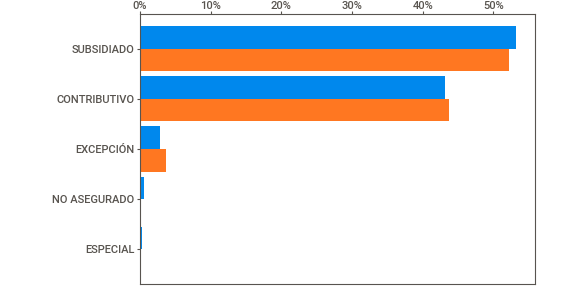
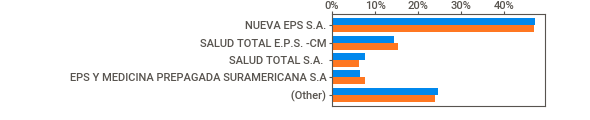
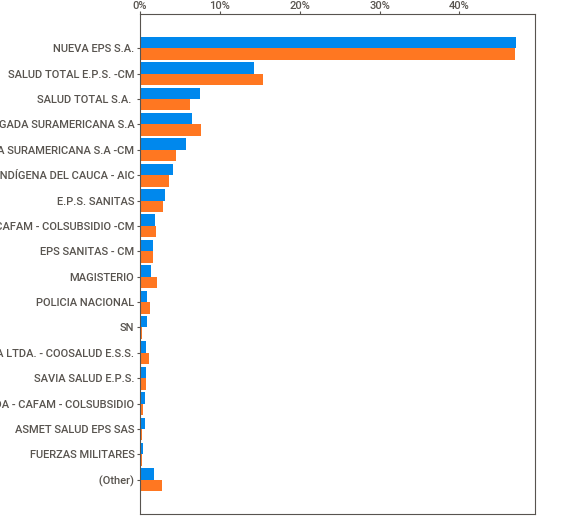
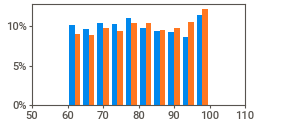
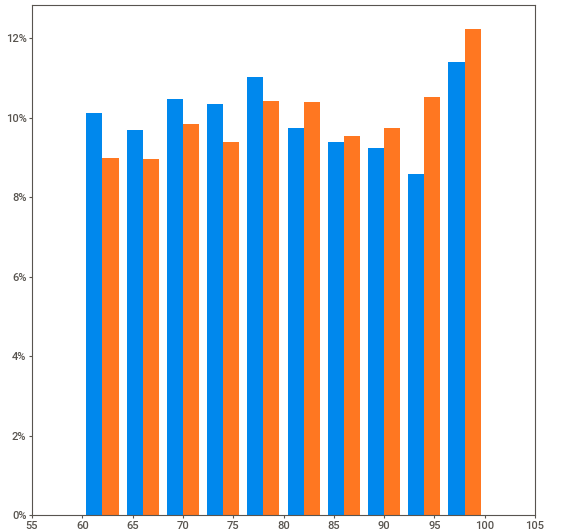
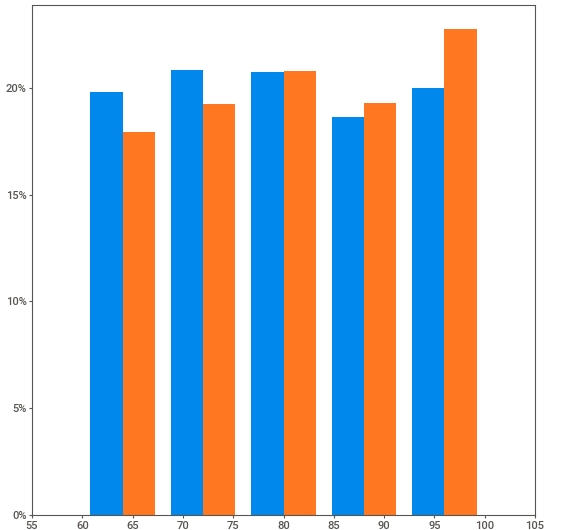
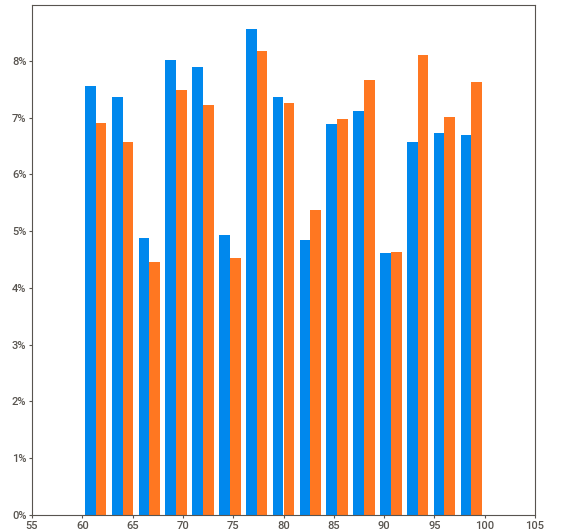
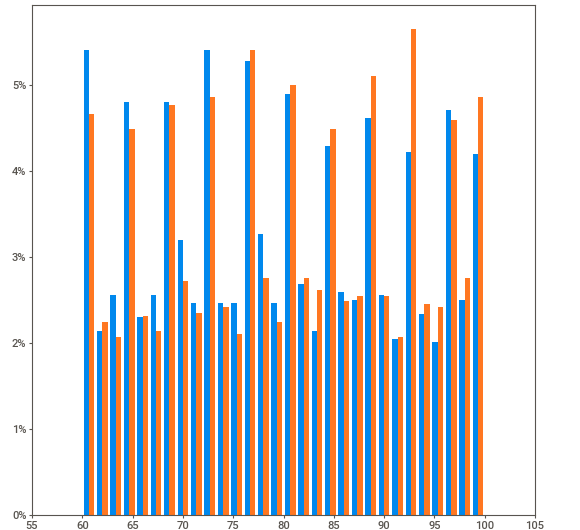
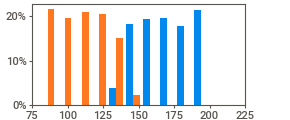
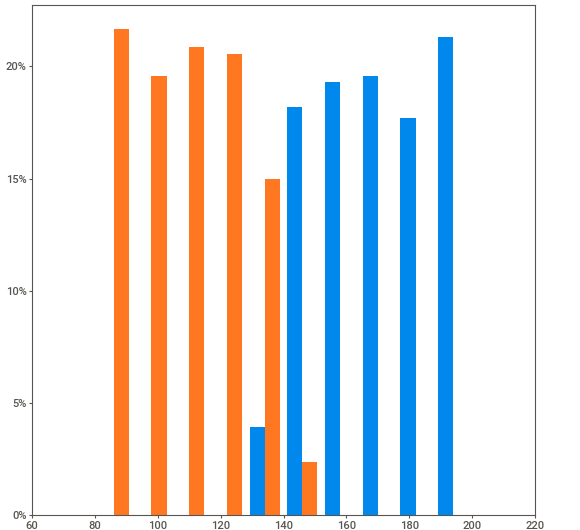
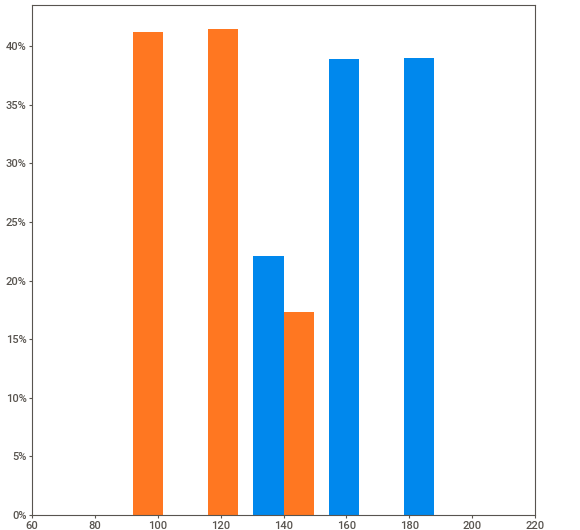
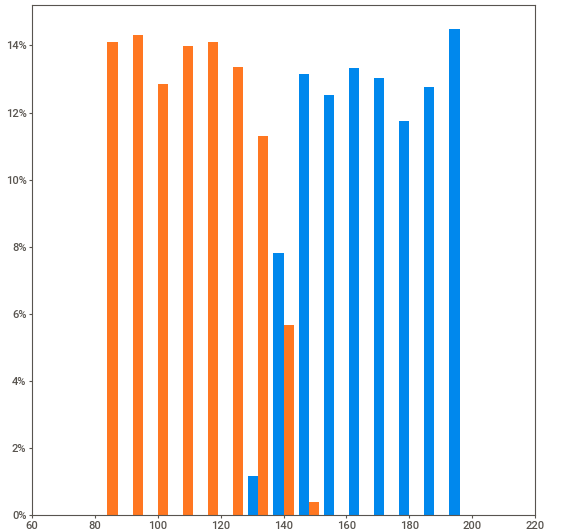
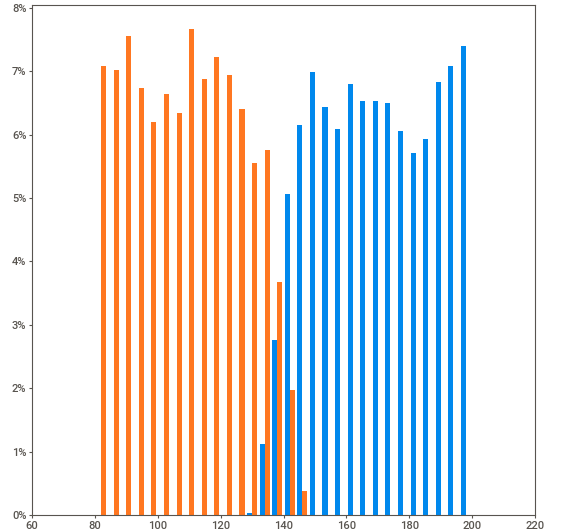
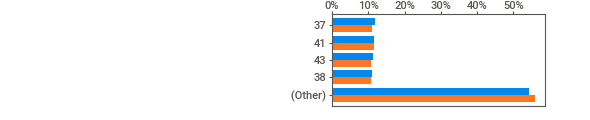
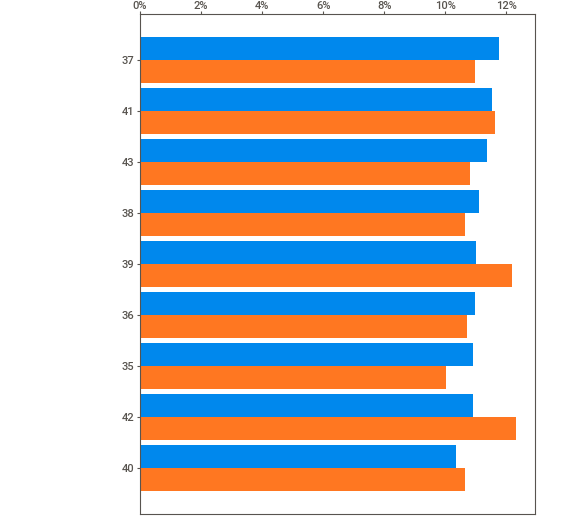
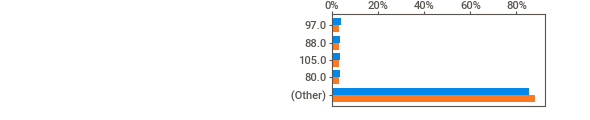
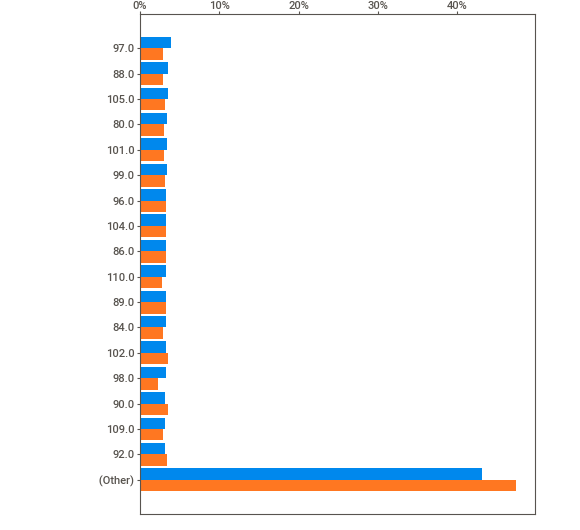
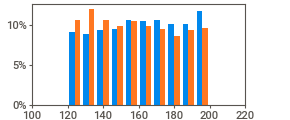
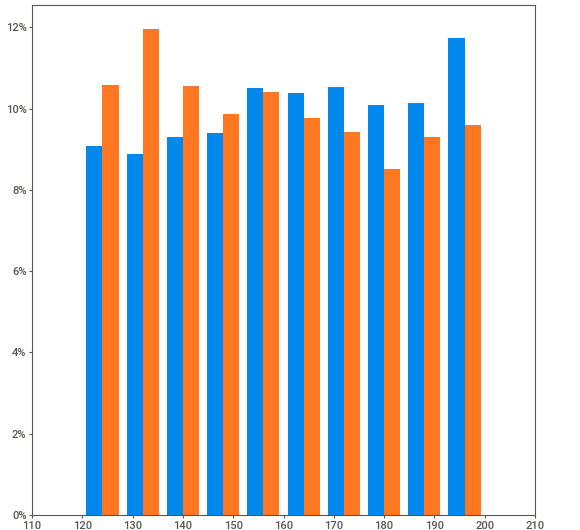
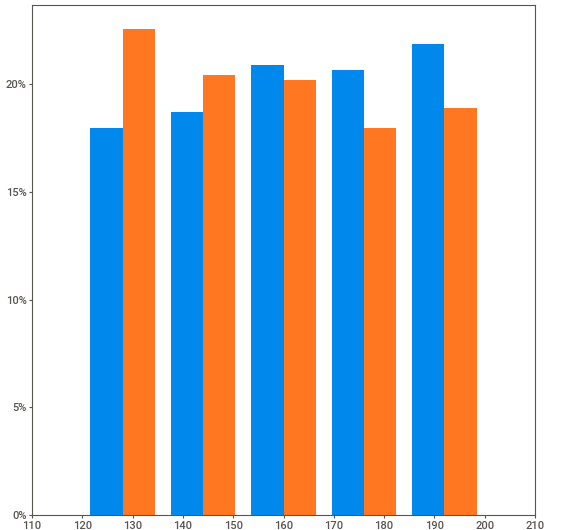
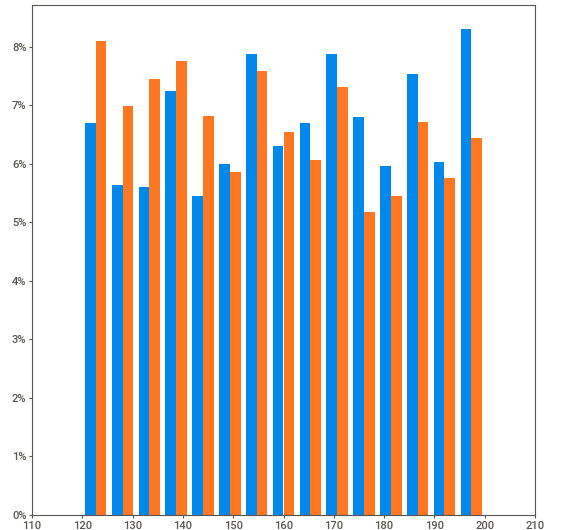
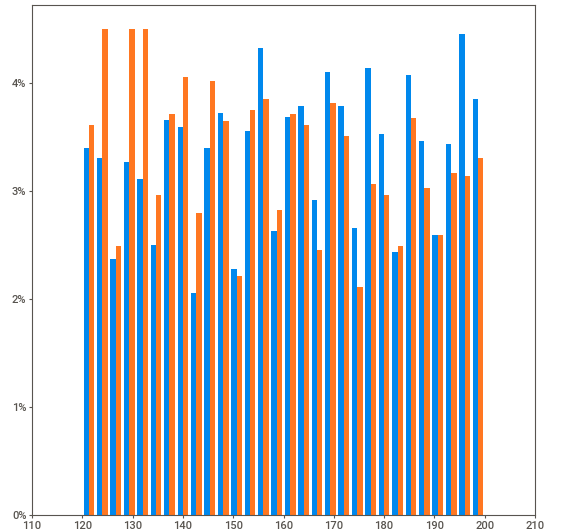
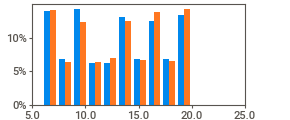
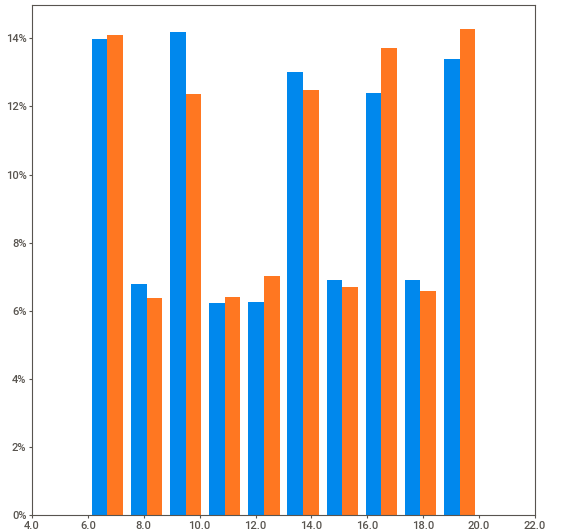
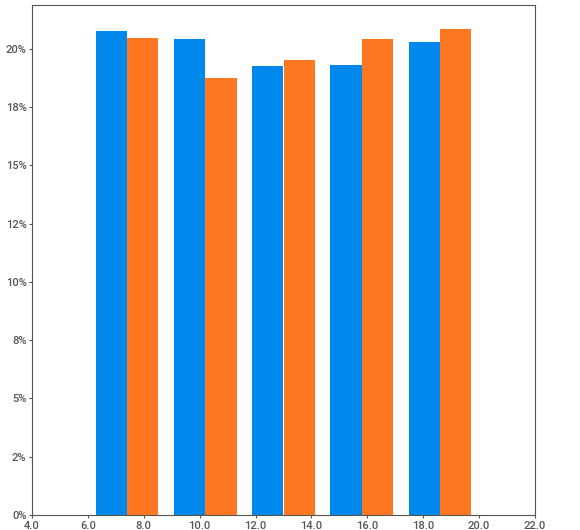
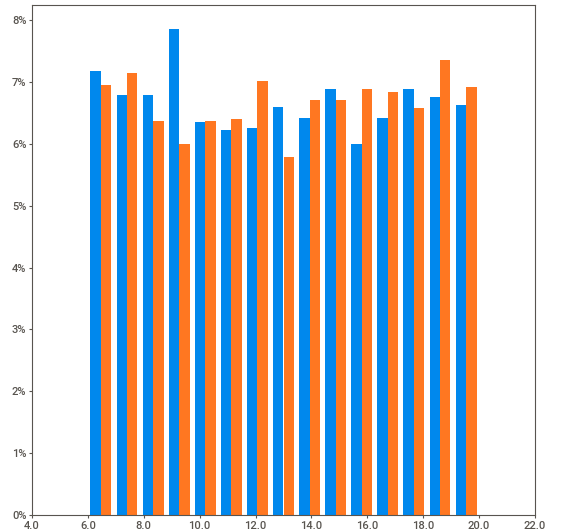
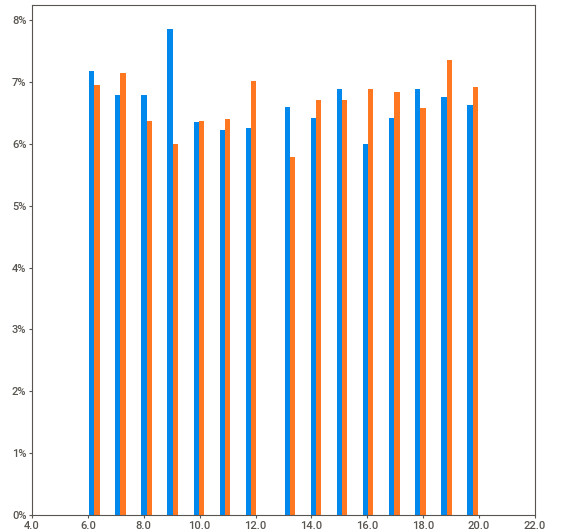
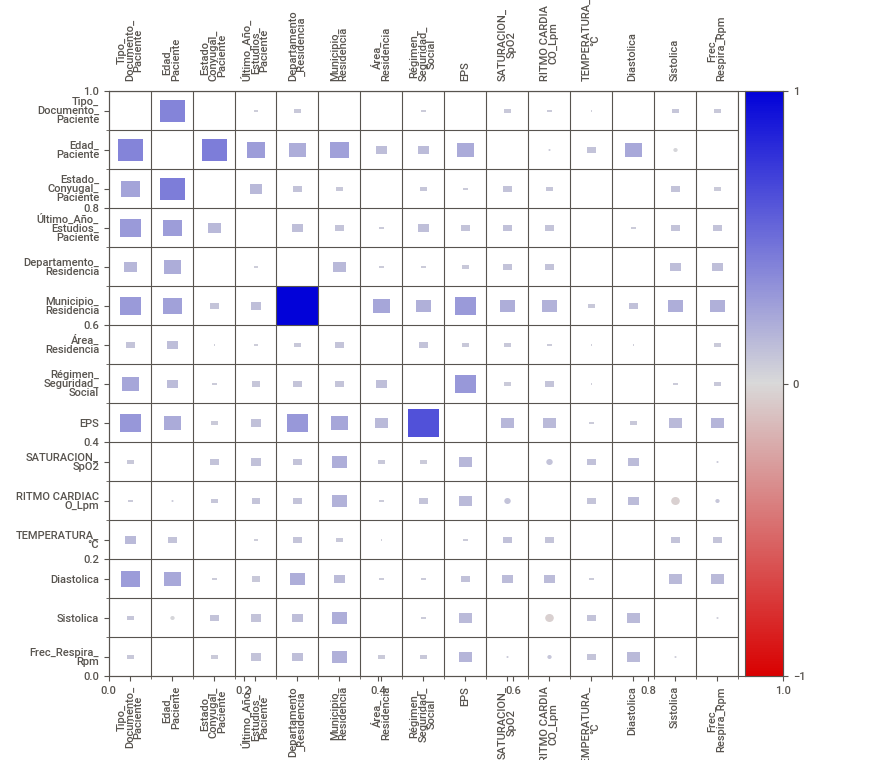
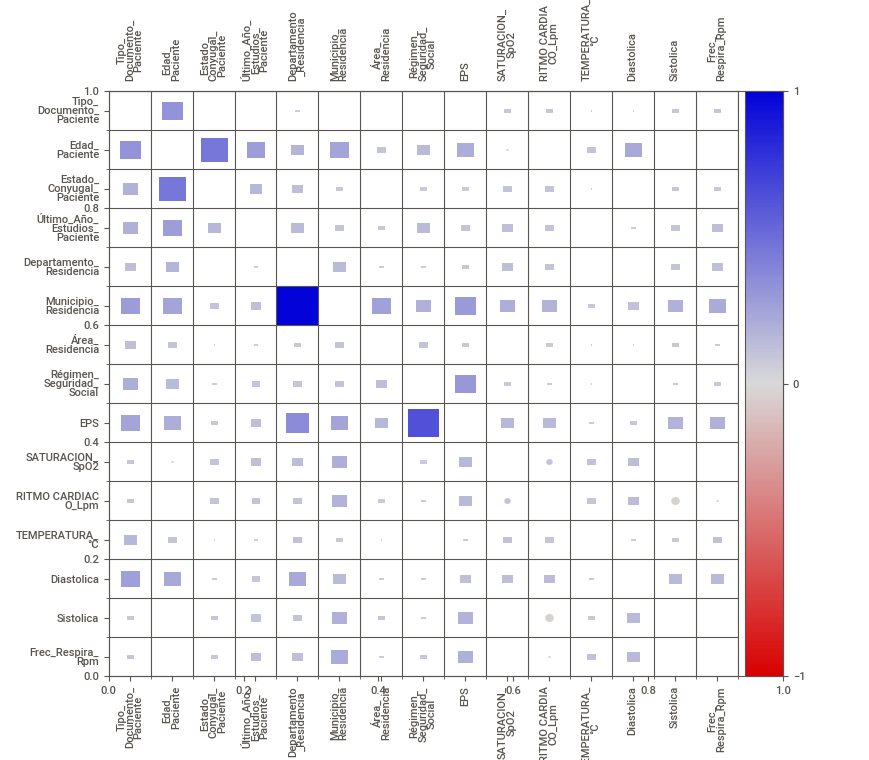

In [ ]:
#@title La función advert_report.show_notebook muestra el reporte de análisis exploratorio de datos (EDA) en un notebook Jupyter, con el siguiente formato:

# layout='vertical': muestra los datos en una columna vertical
# w=1400 y h=500: ajusta el ancho y alto del reporte a 1400x500 píxeles
# scale=0.9: muestra el reporte a un 90% de su tamaño original
advert_report.show_notebook(layout='vertical', w=1400, h=500, scale=0.9)

In [ ]:
# prompt: generar los modelos KMeans, DBSCAN y AgglomerativeClustering, probarlos, generar reporte y descargar

from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import pandas as pd
import numpy as np

# Assuming 'target_column_name' is the actual name of your target column
#h2o_df[healthy_life_df_columnas_seleccionadas.columns[0]] = h2o_df[healthy_life_df_columnas_seleccionadas.columns[0]].asfactor()

# Define the models
kmeans = KMeans(n_clusters=best_k, random_state=0)  # Use the best_k from your KMeans analysis
dbscan = DBSCAN(eps=0.5, min_samples=100)  # Adjust eps and min_samples as needed
agglomerative = AgglomerativeClustering(n_clusters=best_k)  # Use the same best_k or a different one

# Fit and predict for each model
kmeans_labels = kmeans.fit_predict(df_transformed)
dbscan_labels = dbscan.fit_predict(df_transformed)
agglomerative_labels = agglomerative.fit_predict(df_transformed)

# Evaluate the models (example using Silhouette Score)
kmeans_silhouette = silhouette_score(df_transformed, kmeans_labels)

# Check if DBSCAN found more than one cluster
if len(np.unique(dbscan_labels)) > 1:
    dbscan_silhouette = silhouette_score(df_transformed, dbscan_labels)
else:
    dbscan_silhouette = np.nan  # Assign NaN if only one cluster is found
    print("DBSCAN found only one cluster. Silhouette score cannot be calculated.")

agglomerative_silhouette = silhouette_score(df_transformed, agglomerative_labels)

print("KMeans Silhouette Score:", kmeans_silhouette)
print("DBSCAN Silhouette Score:", dbscan_silhouette)
print("Agglomerative Silhouette Score:", agglomerative_silhouette)

# Generate a report (example)
report = {
    'Model': ['KMeans', 'DBSCAN', 'Agglomerative Clustering'],
    'Silhouette Score': [kmeans_silhouette, dbscan_silhouette, agglomerative_silhouette]
}

report_df = pd.DataFrame(report)
print(report_df)

# You can further analyze each model's labels
# For example: healthy_life_df_columnas_seleccionadas[kmeans_labels == 0]

# Save the report to a file
report_df.to_csv('clustering_report.csv', index=False)
from google.colab import files
files.download('clustering_report.csv')

DBSCAN found only one cluster. Silhouette score cannot be calculated.
KMeans Silhouette Score: 0.3940062137641072
DBSCAN Silhouette Score: nan
Agglomerative Silhouette Score: 0.36563978478425363
                      Model  Silhouette Score
0                    KMeans          0.394006
1                    DBSCAN               NaN
2  Agglomerative Clustering          0.365640


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# prompt: descargar los modelos en formato csv

# Assuming healthy_life_df_columnas_seleccionadas and best_labels are defined as in the original code.

# Create DataFrames for each cluster
cluster_0_df = healthy_life_df_columnas_seleccionadas[best_labels == 0]
cluster_1_df = healthy_life_df_columnas_seleccionadas[best_labels == 1]

# Save each cluster to a CSV file
cluster_0_df.to_csv('cluster_0.csv', index=False)
cluster_1_df.to_csv('cluster_1.csv', index=False)


# Download the CSV files
files.download('cluster_0.csv')
files.download('cluster_1.csv')

# If you have more clusters, repeat the process:
# cluster_2_df = healthy_life_df_columnas_seleccionadas[best_labels == 2]
# cluster_2_df.to_csv('cluster_2.csv', index=False)
# files.download('cluster_2.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>